<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



utf8         (1.2.4 -> 1.2.5     ) [CRAN]
numDeriv     (NA    -> 2016.8-1.1) [CRAN]
matrixStats  (NA    -> 1.5.0     ) [CRAN]
distribut... (NA    -> 0.5.0     ) [CRAN]
tensorA      (NA    -> 0.36.2.1  ) [CRAN]
checkmate    (NA    -> 2.3.2     ) [CRAN]
abind        (NA    -> 1.4-8     ) [CRAN]
posterior    (NA    -> 1.6.1     ) [CRAN]


Installing 8 packages: utf8, numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp0bQ3m0/remotes3f912352950/stan-dev-cmdstanr-68b5862/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.9.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.9.0

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.36.0

* Installing CmdStan v2.36.0 in /root/.cmdstan/cmdstan-2.36.0

* Downloading cmdstan-2.36.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



g++ -Wno-deprecated-declarations -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -MT bin/cmdstan/stansummary.o -MM -E -MG -MP -MF src/cmdstan/stansummary.d src/cmdstan/stansummary.cpp
cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sund

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.36.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0



[1] "2.36.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp0bQ3m0/remotes3f950478b3c/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


mean       sd        5.5%       94.5%     rhat      ess_bulk
a -0.1772371 0.2117415 -0.5125404 0.1626823 0.9985809 308.9250
b  1.0503909 0.2384334  0.6895473 1.4368665 1.0115223 331.6645

# Chapter 15

## Easy

### 15E1

Rewrite the Oceanic tools model (from Chapter 11) below so that it assumes measured error on the log population sizes of each society. You don’t need to fit the model to data. Just modify the  mathematical formula below.  

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_i$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$


#### Answer

To add measurement error, we need to give a probability distribution to the errant variable (here, $\text{log} P_i$) such that we can interpret each observation of that variable as containing both signal and noise.

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_{i}^{true}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\text{log} P_i \sim Normal(P_{i}^{true}, \sigma_P)$$
$$\sigma_P \sim exponential(1)$$

### 15E2

Rewrite the same model so that it allows imputation of missing values for log population.  There aren’t any missing values in the variable, but you can still write down a model formula that  would imply imputation, if any values were missing.


#### Answer

Now we do basically the same thing that we did in 15E1 for measurement error, except we apply the concept one level deeper.

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_{i}^{}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\text{log} P_i \sim Normal(\bar{P}, \sigma_P)$$
$$\bar{P} \sim Normal(0,1)$$
$$\sigma_P \sim exponential(1)$$

Notice the difference between 15E1 and 15E2.
* In 15E1, we assumed our observations were tainted by noise.  Hence, we used a distribution of $\text{log} P_i$ to create our linear model.
* In 15E2, we assumed our observations were accurate, but that some were missing.  Hence, we created our linear model wi the observed values of $\text{log} P_i$.  But since some of these were missing, we again assigned a distribution to $\text{log} P_i$, but this time such that it would only apply to missing values.

## Medium

### 15M1

Using the mathematical form of the imputation model in the chapter, explain what is being assumed about how the missing values were generated.

#### Answer

I'm not sure which model we're meant to refer to, but I don't it think it matters that much for this question.  So let's use the model we made in Question 15E2:

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \color{blue}{\text{log} P_{i}^{}}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\color{blue}{\text{log} P_i \sim Normal(\bar{P}, \sigma_P)}$$
$$\color{blue}{\bar{P}^{} \sim Normal(0,1)}$$
$$\color{blue}{\sigma_P \sim exponential(1)}$$

The next thing I'm not sure about is the wording of the question--"...what is being assumed about how the missing values were generated".  The way the math generates them is spelled out in the model: missing values of $\text{log}P_i$ are generated randomly from a normal distribution with mean $\bar{P}$ and standard deviation $\sigma_P$.  If this captures something about the way the real-world values, which went missing, were generated, then it implies the assumption that those values were generated by the same process as the observed values and that their missingness was completely random--MCAR.

### 15M2

Reconsider the primate milk missing data example from the chapter. This time, assign $B$ a  distribution that is properly bounded between zero and 1. A beta distribution, for example, is a good  choice.

#### Answer

Let's jump right in with the modified model.

In [ ]:
data(milk)
d <- milk
d$neocortex.prop <- d$neocortex.perc/100
d$logmass <- log(d$mass)
dat_list <- list(K = standardize(d$kcal.per.g),
                 B = d$neocortex.prop, # No longer normalized, since we're constraining w/beta distribution
                 M = standardize(d$logmass))
m15.5b <- ulam(
  alist(
    K ~ dnorm(mu, sigma),
      mu <- a + bB*B + bM*M,
        a ~ dnorm(0, 0.5),
        bB ~ dnorm(0, 0.5),
        B ~ dbeta2(nu, tau),
          nu ~ dbeta(2, 2),
          tau ~ dexp(1),
        bM ~ dnorm(0, 0.5),
      sigma ~ dexp( 1 )
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000)

Found 12 NA values in B and attempting imputation.



Running MCMC with 4 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: beta_lpdf: Random variable[2] is -1.02276, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Exception: beta_lpdf: Random variable[2] is -1.02276, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: beta_lpdf: Random variable[4] is -0.712675, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Exception: beta_lpdf: Random variable[4] is -0.712675, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the in

Hm, that didn't work.  There's one or two issues.  First, the warnings suggest that my imputed values are not abiding by the boundaries of the beta distribution.  For this, I'll set a prior on the imputed values.  Second, I think there could be a problem due to the fact that we're no longer using a standardized version of $B$.  So maybe we need to adjust the prior for its coefficient `bB`.

In [ ]:
m15.5c <- ulam(
  alist(
    K ~ dnorm(mu, sigma),
      mu <- a + bB*B + bM*M,
        a ~ dnorm(0, 0.5),
        bB ~ dnorm(0, 3),
        B ~ dbeta2(nu, tau),
          nu ~ dbeta(2, 2),
          tau ~ dexp(1),
          vector[12]:B_impute ~ uniform(0,1),
        bM ~ dnorm(0, 0.5),
      sigma ~ dexp( 1 )
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000)

Found 12 NA values in B and attempting imputation.



Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: beta_lpdf: Second shape parameter is 0, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: beta_lpdf: Second shape parameter is 0, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: beta_lpdf: First shape parameter is inf, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 5

In [ ]:
precis(m15.5c, depth=2)

mean       sd         5.5%       94.5%       rhat      ess_bulk
a            -0.1663713 0.47772002 -0.9121279  0.58915282 1.0036138 1157.245
bB            0.2800596 0.76303821 -0.9261201  1.49820380 1.0014097 1173.933
nu            0.6507154 0.03909982  0.5853071  0.70896253 1.0018106 1544.129
tau           8.3698872 2.66194107  4.5250068 12.92875300 1.0023682  753.934
bM           -0.2956742 0.16866500 -0.5632760 -0.03991805 1.0015932 2319.045
sigma         0.9779725 0.13770218  0.7816022  1.20436210 1.0021883 2144.276
B_impute[1]   0.6407210 0.16926288  0.3527206  0.88669571 1.0006170 2396.170
B_impute[2]   0.6407774 0.16839697  0.3489696  0.89153785 1.0009875 2375.803
B_impute[3]   0.6375080 0.16867474  0.3423283  0.88266287 1.0017051 2160.040
B_impute[4]   0.6515037 0.16613353  0.3685694  0.89536614 1.0017540 2214.775
B_impute[5]   0.6601134 0.16602669  0.3690484  0.89876024 1.0002601 1956.221
B_impute[6]   0.6530106 0.16400430  0.3789867  0.89782534 1.0033682 1980.260
B_impute[7]   0.6545913 0.16244715  0.3744403  0.88993188 1.0011202 2587.442
B_impute[8]   0.6551664 0.16466130  0.3654123  0.88761164 0.9999102 2479.088
B_impute[9]   0.6566555 0.16682043  0.3661977  0.89677480 1.0004192 2530.477
B_impute[10]  0.6396049 0.16983138  0.3418162  0.88243158 1.0017467 1852.922
B_impute[11]  0.6439727 0.16753873  0.3538755  0.88453694 0.9998195 2528.263
B_impute[12]  0.6489937 0.17073447  0.3589673  0.89369783 1.0068968 1707.491

Bingo.

### 15M3

Repeat the divorce data measurement error models, but this time double the standard errors.  Can you explain how doubling the standard errors impacts inference?

#### Answer

Let's copy-paste, then modify the model from the chapter.

In [ ]:
data(WaffleDivorce)
d <- WaffleDivorce
dlist <- list(D_obs = standardize(d$Divorce),
              D_sd = (d$Divorce.SE / sd(d$Divorce))*2, # double SE
              M = standardize(d$Marriage),
              A = standardize(d$MedianAgeMarriage),
              N = nrow(d))

m15.1 <- ulam(
  alist(
    D_obs ~ dnorm(D_true, D_sd),
      vector[N]:D_true ~ dnorm(mu, sigma),
        mu <- a + bA*A + bM*M,
          a ~ dnorm(0, 0.2),
          bA ~ dnorm(0, 0.5),
          bM ~ dnorm(0, 0.5),
          sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iter

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




We're getting some warnings about E-BFMI.  Roughly speaking, this means that our chains are having difficulting exploring the additional uncertainty in the posterior.  Let's try to fix this with a non-central parameterization.

In [ ]:
m15.1nc <- ulam(
  alist(
    D_obs ~ dnorm(mu + z_true*sigma, D_sd),
      vector[N]:z_true ~ dnorm(0, 1),
        mu <- a + bA*A + bM*M,
          a ~ dnorm(0, 0.2),
          bA ~ dnorm(0, 0.5),
          bM ~ dnorm(0, 0.5),
          sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iter

In [ ]:
round(precis(m15.1nc),2)

50 vector or matrix parameters hidden. Use depth=2 to show them.



mean  sd   5.5%  94.5% rhat ess_bulk
a     -0.11 0.10 -0.28  0.05 1    2498.82 
bA    -0.65 0.17 -0.91 -0.38 1    2434.08 
bM     0.20 0.19 -0.11  0.51 1    2294.92 
sigma  0.15 0.11  0.01  0.36 1    1116.14

That fixed it.  What do we see has happened compared to the chapter.

In the chapter, when the SE was normal, we got a precis output

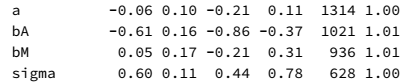

Neither `a` nor `bA` have really changed, but `bM` and `sigma` have.  Both the estimate and credibility interval have increased for `bM` while the estimate for `sigma` has decreased. Apparently, the less-precise estimates for each state has shifted how much influence each state exerts on the model.

### 15M4

Simulate data from this DAG: $X → Y → Z$. Now fit a model that predicts $Y$ using both $X$ and $Z$. What kind of confound arises, in terms of inferring the causal influence of $X$ on $Y$?

#### Answer
We can do this outside of the Bayesian framework.  Let's simulate some data.

In [ ]:
N <- 100
X <- rnorm(N)
  a <- 1.5
Y <- a*X + rnorm(N)
  b <- 2.25
Z <- b*Y + rnorm(N)

Now let's run the regression.

In [ ]:
m <- lm(Y ~ X+Z)
summary(m)


Call:
lm(formula = Y ~ X + Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89316 -0.30785  0.00368  0.28177  1.01401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03304    0.04110  -0.804  0.42338    
X            0.26215    0.07023   3.733  0.00032 ***
Z            0.35894    0.01669  21.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4059 on 97 degrees of freedom
Multiple R-squared:  0.9447,	Adjusted R-squared:  0.9436 
F-statistic: 828.5 on 2 and 97 DF,  p-value: < 2.2e-16


If this regression were causally valid, then we should get that the coefficient for `X` would equal `a`.  But it doesn't.  We should've predicted this would be the case since we knew that our regression did not reflect the causal genesis of the data.

But more specifically in this case, we're conditioning on $Z$, which is a *descendant* of $Y$.  What happens when we condition on a descendant?  It's like conditioning on the parent...which, here, is $Y$.  So we're kinda conditioning on the outcome variable.  If this were done in the course of an experiment, rather than statistically after the data was generated, we'd call this "selection bias".

### 15M5

Return to the singing bird model, `m15.9`, and compare the posterior estimates of cat presence  (`PrC1`) to the true simulated values. How good is the model at inferring the missing data? Can you think of a way to change the simulation so that the precision of the inference is stronger?

#### Answer
Let's copy and paste from the chapter.

In [ ]:
set.seed(9)
N_houses <- 100L
k <- 0.5
cat <- rbern( N_houses, k) # probability of cat

alpha <- 5
beta <- (-3)
notes <- rpois( N_houses, alpha + beta*cat) # number of notes as function of cat

r <- 0.2
R_C <- rbern( N_houses, r) # probability of not knowing cat status

cat_obs <- cat
cat_obs[R_C==1] <- (-1L) # replace each unknon cat with -1; model skips values that are not valid (here, 0 or 1)

dat <- list(
  notes = notes,
  cat = cat_obs,
  RC = R_C,
  N = as.integer(N_houses))

In [ ]:
m15.9 <- ulam(
  alist(
    #singing bird model
    notes|RC==0 ~ poisson( lambda), # notes when cat status is known
    notes|RC==1 ~ custom( log_sum_exp( # notes when cat status NOT known; is weighted avg on log scale
      log(k) + poisson_lpmf( notes | exp(a + b)),
      log(1-k) + poisson_lpmf( notes | exp(a))
    )),
    log(lambda) <- a + b*cat,
    a ~ normal(0,1),
    b ~ normal(0,0.5),

    #sneaking cat model
    cat|RC==0 ~ bernoulli(k), # we update parameter k, the probability of cat, whenever we observe cat status
    k ~ beta(2,2),

    #imputed values
    gq> vector[N]:PrC1 <- exp(lpC1)/(exp(lpC1)+exp(lpC0)), # averaged prob of notes
    gq> vector[N]:lpC1 <- log(k) + poisson_lpmf( notes[i] | exp(a+b)), # prob of notes given cat
    gq> vector[N]:lpC0 <- log(1-k) + poisson_lpmf( notes[i] | exp(a)) # prob of notes given NO cat
    ), data=dat, chains=4, cores=4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 5

Now we need to compare the model's predictions for `PrC1` to the raw data.

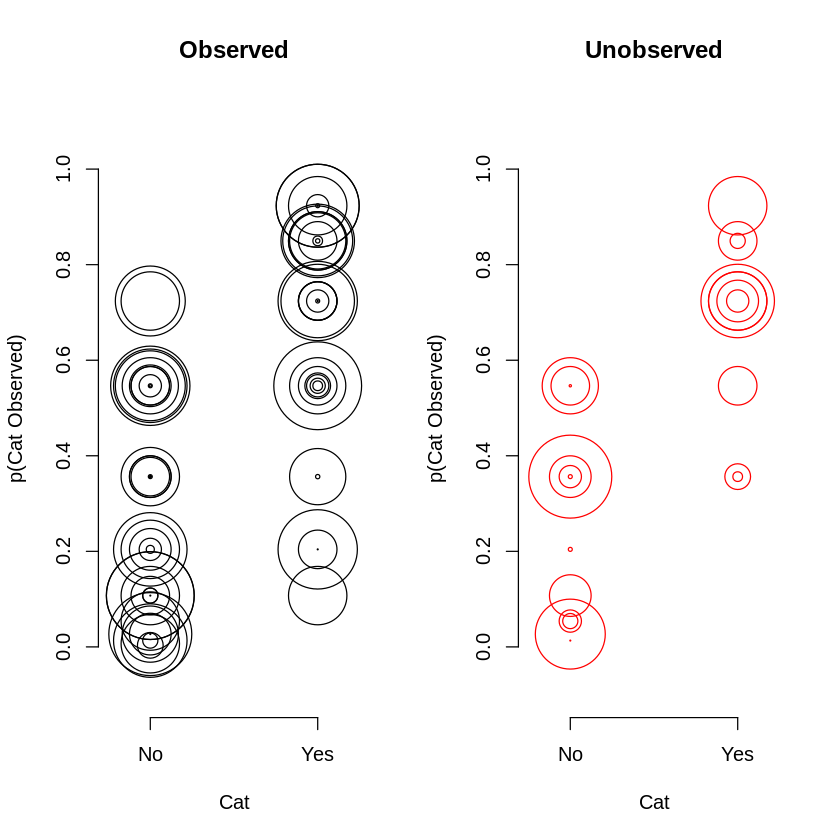

In [ ]:
post <- extract.samples(m15.9)
post_PrC1 <- post$PrC1
PrC1_means <- colMeans(post_PrC1)
PrC1_CrIs <- apply(post_PrC1, 2, HPDI)

par(mfrow=c(1,2))
plot(PrC1_means[R_C==0] ~ cat[R_C==0],
     col="black", cex=PrC1_CrIs*10,
     xlab="Cat", ylab="p(Cat Observed)",
     xlim=c(-0.25, 1.25), ylim=c(-0.1, 1.1),
     main="Observed",
     bty="n", xaxt="n"); axis(1, at = c(0, 1), labels = c("No", "Yes"))

plot(PrC1_means[R_C==1] ~ cat[R_C==1],
     col="red", cex=PrC1_CrIs*10,
     xlab="Cat", ylab="p(Cat Observed)",
     xlim=c(-0.25, 1.25), ylim=c(-0.1, 1.1),
     main="Unobserved",
     bty="n", xaxt="n"); axis(1, at = c(0, 1), labels = c("No", "Yes"))

Is this a good fit?

One way we could assess this is to take the `unique(PrC1_means)` values and see how close they are to the observed `cat` values.

In [ ]:
# notice there are more observations than unique mean values
length(PrC1_means)
length(unique(PrC1_means))

[1] 100

[1] 12

[1] 0.1474598

[1] 30.36792

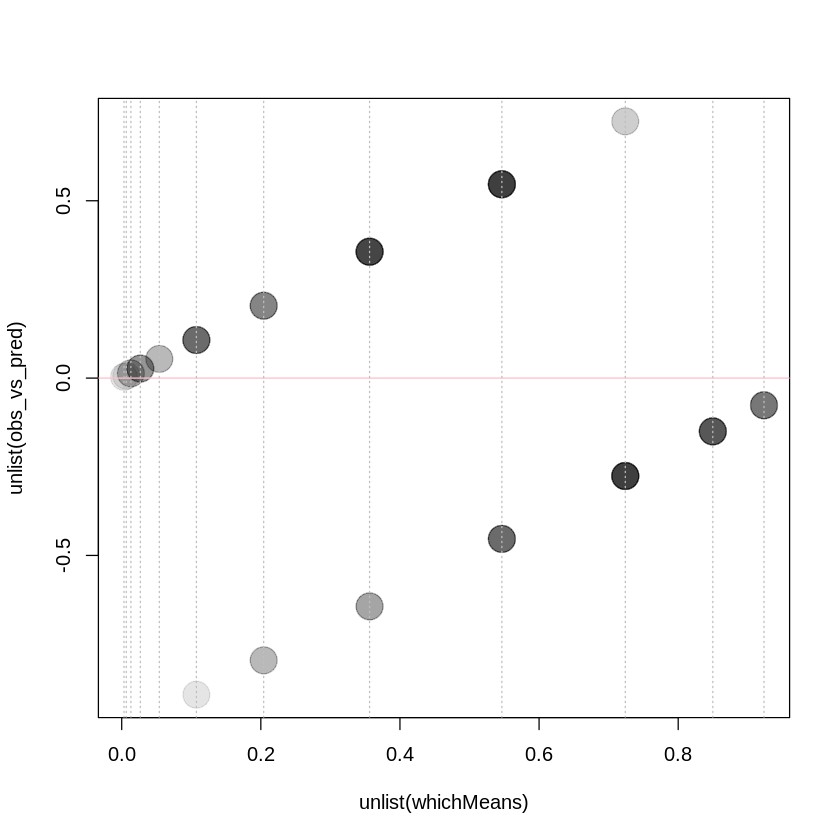

In [ ]:
whichMeans <- list()
obs_vs_pred <- list()
for(m in 1:length(unique(PrC1_means))){
  active_mean <- unique(PrC1_means)[m]
  matching_means <- which(PrC1_means==active_mean)
  correspondObs <- cat[matching_means]
  whichMeans[[m]] <- PrC1_means[PrC1_means==active_mean]
  obs_vs_pred[[m]] <- active_mean - correspondObs
}


plot(unlist(obs_vs_pred) ~ unlist(whichMeans),
     cex=3, pch=19, col=adjustcolor("black", 0.1))
abline(h=0, col="pink")
for(u in 1:length(unique(PrC1_means))){
  abline(v=unique(PrC1_means)[u], col="grey", lty=3)
}

sum(unlist(obs_vs_pred))
sum(abs(unlist(obs_vs_pred)))

Of course, we can only say how "good" this fit is by comparing it to another model.  

For the final part of the question, how might we change the simulation to increase the precision of the inference?  This seems like an oddly-worded question: wouldn't we want to change the model rather than the simulation?  But if we're changing the simulated data, two obvious ways would be to 1) increase our sample size `N_houses` or 2) make our data less ambiguous by, say, adjusting the effect of `cat` in our linear model `alpha + beta*cat` to make it more salient.

### 15M6

Return to the four dog-eats-homework missing data examples. Simulate each and then fit  one or more models to try to recover valid estimates for $S → H$.

In [ ]:
N <- 100
S <- rnorm( N )
H <- rbinom( N , size=10 , inv_logit(S) )

#### MCAR
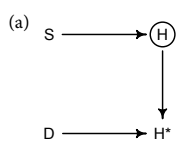

Since there is no open connection between $S$ and $D$ (no relationship between studying and dog eating the homework) we assume that missing homework is uniformly distributed among students.  So we can just proceed as though our sample is smaller but unbiased.

In [ ]:
D <- rbern( N ) # dogs completely random
Hm <- H
Hm[D==1] <- NA # all dogs eat homework

obs <- which(!is.na(Hm)) # observations with no dogs and thus with homework

mcar_dlist <- list(H=Hm[obs],
                   S=S[obs]) # select cases without dogs

In [ ]:
m_mcar <- ulam(
  alist(
    H ~ dbinom(10,p),
      logit(p) <- a + bS*S,
        a ~ dnorm(0, 1.5),
        bS ~ dnorm(0, 0.5)
  ), data=mcar_dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

The expected value for `bS` should be 1.

In [ ]:
round(precis(m_mcar),2)

mean  sd   5.5%  94.5% rhat ess_bulk
a  -0.02 0.11 -0.19 0.15  1    1454.40 
bS  0.82 0.12  0.63 1.03  1    1273.18

Depending on the run, we're somewhere close.

#### MAR I
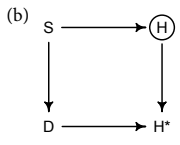

Now there *is* a relationship between $S$ and $D$ that we need to close of.  Given the DAG, we can only do this by conditioning on $S$...which, incidentally, we are already doing.

In [ ]:
D <- ifelse( S > 0, 1, 0 ) # dogs random
Hm <- H
Hm[D==1] <- NA

obs <- which(!is.na(Hm))

marI_dlist <- list(H=Hm[obs],
                  S=S[obs])

In [ ]:
m_marI <- ulam(
  alist(
    H ~ dbinom(10,p),
      logit(p) <- a + bS*S,
        a ~ dnorm(0, 1.5),
        bS ~ dnorm(0, 0.5)
  ), data=marI_dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
round(precis(m_marI),2)

mean  sd   5.5%  94.5% rhat ess_bulk
a  -0.22 0.16 -0.47 0.03  1.01 627.48  
bS  0.71 0.17  0.45 0.98  1.01 618.39

#### MAR II
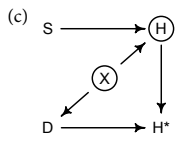

This has already been done in the chapter.
Here, the relationship is between missingness and the the homework.  This is a problem.  Let's see what happens if we just employ the same model as before.

In [ ]:
N <- 1000
X <- rnorm(N)
S <- rnorm(N)
H <- rbinom(N, size=10, inv_logit(2 + S - 2*X))
D <- ifelse(X>1, 1, 0)
Hm <- H
Hm[D==1] <- NA
obs <- which(!is.na(Hm))

marII_dlist <- list(H=Hm[obs], S=S[obs])

In [ ]:
m_marII <- ulam(
  alist(
    H ~ dbinom(10,p),
      logit(p) <- a + bS*S,
        a ~ dnorm(0, 1.5),
        bS ~ dnorm(0, 0.5)
  ), data=marII_dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration:

In [ ]:
round(precis(m_marII),2)

mean sd   5.5% 94.5% rhat ess_bulk
a  1.92 0.03 1.86 1.97  1    900.65  
bS 0.85 0.04 0.79 0.91  1    793.14

I don't think there's much we can do here without including $X$--which, we did not measure and therefore cannot include in our model.  But if we had some relevant knowledge, we might be able to *model* $X$.

#### MNAR
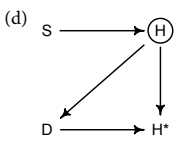

Now, the missingness is DUE TO the homework.  First, what happens if we just continue to use the basic MCAR model.

In [ ]:
D <- ifelse(H < 5, 1, 0) # Missingness depends on H
Hm <- H
Hm[D==1] <- NA

obs <- which(!is.na(Hm))

MNAR_dlist <- list(H=Hm[obs],
                   S=S[obs])

In [ ]:
m_mnarI <- ulam(
  alist(
    H ~ dbinom(10,p),
      logit(p) <- a + bS*S,
        a ~ dnorm(0, 1.5),
        bS ~ dnorm(0, 0.5)
  ), data=MNAR_dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 5

In [ ]:
round(precis(m_mnarI),2)

mean sd   5.5% 94.5% rhat ess_bulk
a  1.90 0.03 1.84 1.95  1    1324.86 
bS 0.34 0.04 0.28 0.40  1    1342.83

The coefficient `bS`, which should be ~1.00, is way off now.

### 15H1 & 15H2

**15H1.** The data in `data(elephants)` are counts of matings observed for bull elephants of differing ages. There is a strong positive relationship between age and matings. However, age is not always assessed accurately.

> First, fit a Poisson model predicting `MATINGS` with `AGE` as a predictor.

> Second,  assume that the observed `AGE` values are uncertain and have a standard error of ±5 years. Re-estimate the relationship between `MATINGS` and `AGE`, incorporating this measurement error. Compare the  inferences of the two models.

**15H2.** Repeat the model fitting problem above, now increasing the assumed standard error on `AGE`.  How large does the standard error have to get before the posterior mean for the coefficient on `AGE` reaches zero?

In [ ]:
data(elephants)
d <- elephants
head(d)

AGE MATINGS
1 27  0      
2 28  1      
3 28  1      
4 28  1      
5 28  3      
6 29  0

For the first model, I think we should assume that they don't begin mating until sexual maturity; so I'll subtract 10 from `AGE`.

I also won't use an intercept, since the number of `MATINGS` at the instant of sexual maturity should be 0.  To enforce this, I'll add an offset.

In [ ]:
m1 <- ulam(
  alist(
    MATINGS ~ dpois(lambda),
      lambda <- exp(b*age) - 1,
        b ~ dnorm(0,3)
  ), data=list(MATINGS = d$MATINGS,
               age = (d$AGE- 10)),
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)



Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warnin

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warnin

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warnin

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.272967, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.000685204, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,


Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warnin

Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -0.0899256, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -0.999949, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac48518cfb.stan', line 14, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but

Chain 3 finished in 1.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.3 seconds.
Total execution time: 3.0 seconds.



Looks like there was some trouble running, so let's look at the trace plot and trank plot.

mean sd 5.5% 94.5% rhat ess_bulk
b 0.05 0  0.04 0.05  1.01 555.06

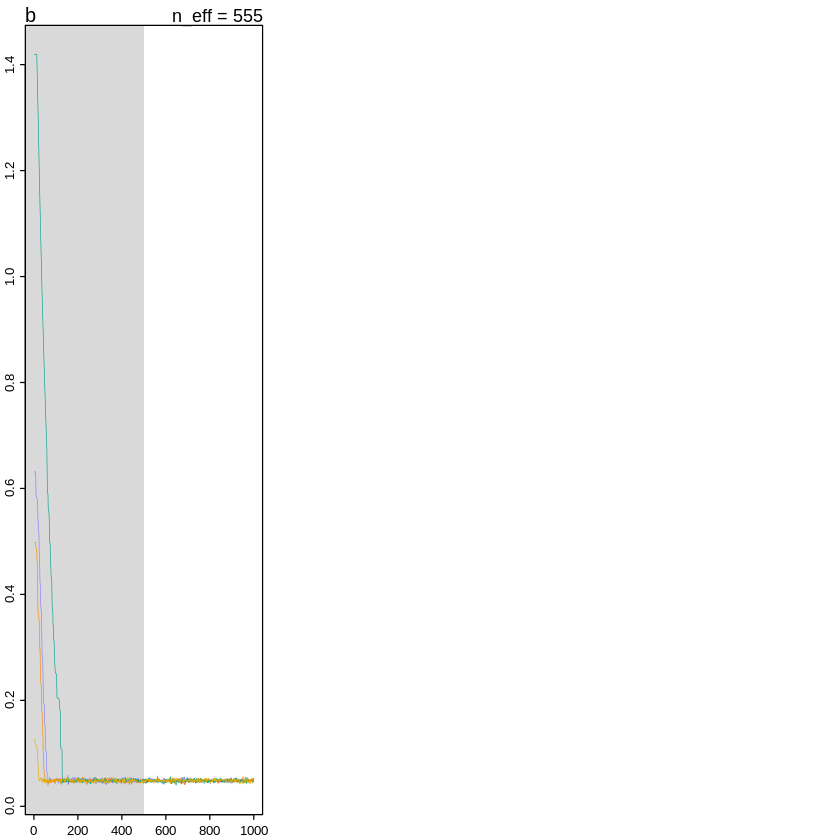

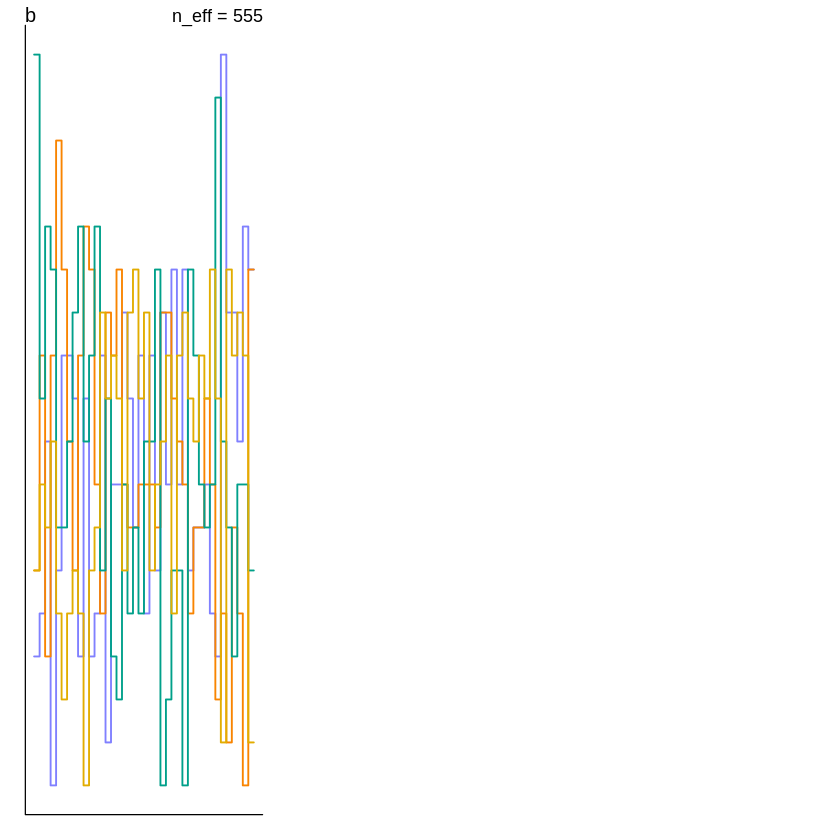

In [ ]:
round(precis(m1),2)

traceplot(m1)
trankplot(m1)

Seems to have mixed okay.

Now let's plot.

In [ ]:
AGE_seq <- seq(from=10, to=max(d$AGE)-10, by=1)

post1 <- extract.samples(m1)
lambdas <- exp(post1$b[,1] %o% AGE_seq) - 1
lambda_means <- colMeans(lambdas)
lambda_HPDIs <- apply(lambdas, 2, HPDI)

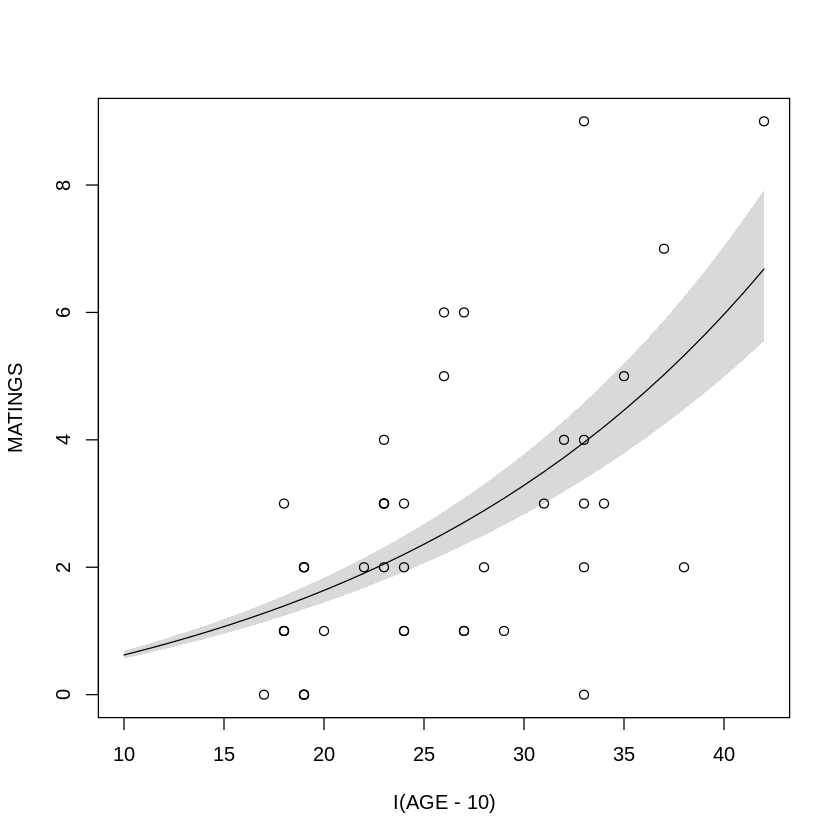

In [ ]:
plot(MATINGS ~ I(AGE-10), d, xlim=range(AGE_seq))
lines(lambda_means ~ AGE_seq)
shade(lambda_HPDIs, AGE_seq)

Next, we need to assume measurement error.

In [ ]:
m2 <- ulam(
  alist(
    MATINGS ~ dpois(lambda),
      lambda <- exp(b*age_true[i]) - 1,
        age_meas ~ dnorm(age_true, 5),
        vector[N]:age_true ~ dunif(0, max_age),
    b ~ dnorm(0,3)
), data=list(MATINGS = d$MATINGS,
             age_meas = d$AGE-10,
             max_age = max(d$AGE)-10,
             N = nrow(d)),
   cores=4,
   chains=4,
   iter=2000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.996494, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.996494, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)



Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[2] is -2.67772e-54, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[2] is -2.21096e-54, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[3] is -0.206515, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[3] is -0.253887, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but 

Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 


Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.110876, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.106504, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Ch

Chain 1 finished in 2.5 seconds.
Chain 3 finished in 2.1 seconds.
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warnin

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if t

Chain 4 finished in 2.1 seconds.
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -0.51068, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -0.239845, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3eea55ce.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but i

Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 6.0 seconds.

All 4 chains 

mean  sd   5.5%  94.5% rhat ess_bulk
age_true[1]  14.36 4.77  6.66 21.95 1    4205.66 
age_true[2]  17.35 4.51 10.05 24.61 1    6292.93 
age_true[3]  17.40 4.32 10.58 24.41 1    7864.23 
age_true[4]  17.34 4.57  9.91 24.72 1    6646.54 
age_true[5]  20.61 4.34 13.85 27.43 1    6837.87 
age_true[6]  16.23 4.78  8.57 23.89 1    5168.61 
age_true[7]  16.28 4.67  8.82 23.78 1    6025.83 
age_true[8]  16.15 4.62  8.61 23.48 1    6027.93 
age_true[9]  19.75 4.42 12.62 26.88 1    5882.87 
age_true[10] 19.83 4.31 13.09 26.74 1    6142.23 
age_true[11] 19.78 4.38 12.75 26.76 1    7604.08 
age_true[12] 18.87 4.55 11.45 26.13 1    6764.47 
age_true[13] 22.14 4.34 15.22 29.10 1    5277.06 
age_true[14] 25.63 4.22 18.86 32.32 1    6182.09 
age_true[15] 24.23 4.29 17.44 31.11 1    6054.07 
age_true[16] 24.37 4.39 17.38 31.56 1    4859.00 
age_true[17] 24.39 4.36 17.54 31.38 1    5124.26 
age_true[18] 22.78 4.34 15.72 29.66 1    8006.49 
age_true[19] 22.21 4.43 15.23 29.13 1    6172.08 
age_true[20] 22.19 4.62 14.69 29.72 1    6220.94 
age_true[21] 23.74 4.35 16.79 30.81 1    6012.27 
age_true[22] 25.14 4.41 18.17 32.38 1    4320.60 
age_true[23] 29.04 4.10 22.42 35.60 1    4502.87 
age_true[24] 30.21 4.24 23.36 36.90 1    4046.94 
age_true[25] 24.60 4.40 17.57 31.84 1    6171.07 
age_true[26] 24.63 4.52 17.44 31.70 1    6652.72 
age_true[27] 30.84 4.14 24.20 37.53 1    4349.85 
age_true[28] 26.85 4.38 20.20 33.88 1    5980.96 
age_true[29] 26.29 4.42 19.03 33.28 1    5723.38 
age_true[30] 30.28 4.20 23.42 36.87 1    5454.79 
age_true[31] 32.08 4.22 25.19 38.82 1    3127.25 
age_true[32] 27.94 4.40 20.81 34.77 1    6382.50 
age_true[33] 30.61 4.38 23.54 37.74 1    4752.85 
age_true[34] 31.73 4.29 24.83 38.52 1    3993.97 
age_true[35] 32.80 4.04 26.04 39.22 1    4166.83 
age_true[36] 36.88 3.27 31.13 41.38 1    3559.34 
age_true[37] 32.31 4.07 25.56 38.85 1    5095.07 
age_true[38] 34.92 3.85 28.49 40.70 1    3942.74 
age_true[39] 37.26 3.12 31.66 41.43 1    4225.08 
age_true[40] 33.98 3.93 27.44 40.13 1    3367.66 
age_true[41] 39.39 2.09 35.47 41.78 1    3301.25 
b             0.05 0.00  0.04  0.05 1    4257.99

Waiting to draw page 2 of 3



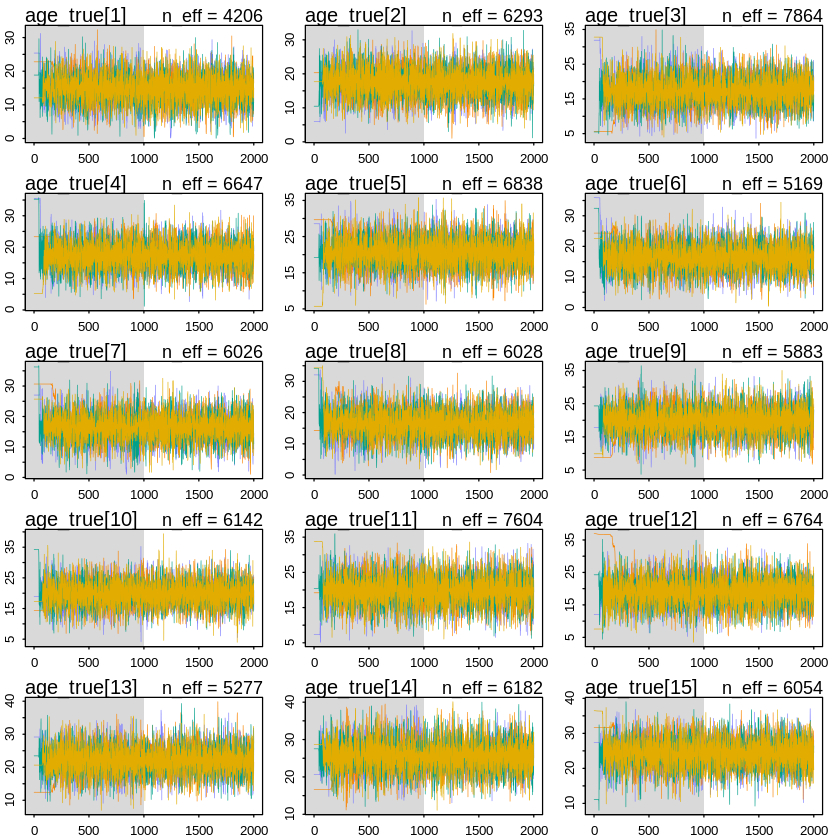

Waiting to draw page 3 of 3



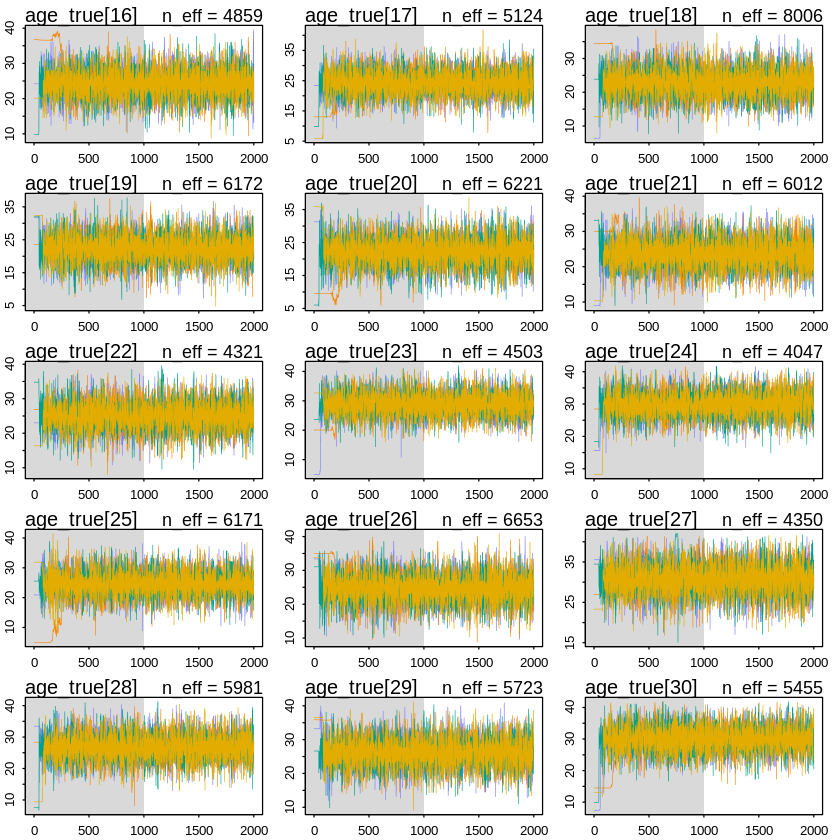

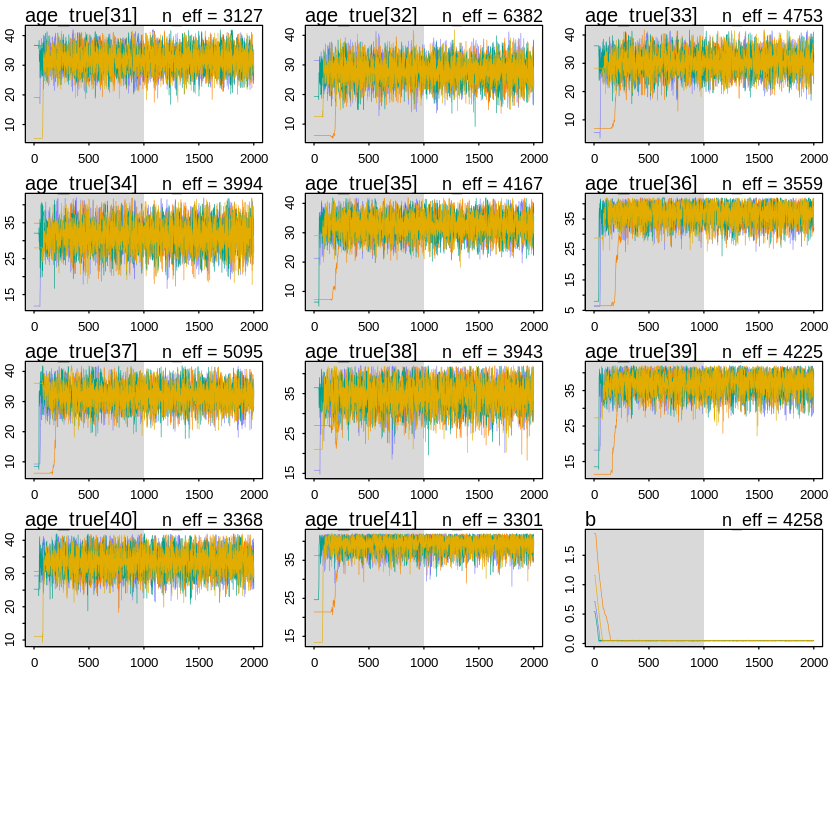

Waiting to draw page 2 of 3



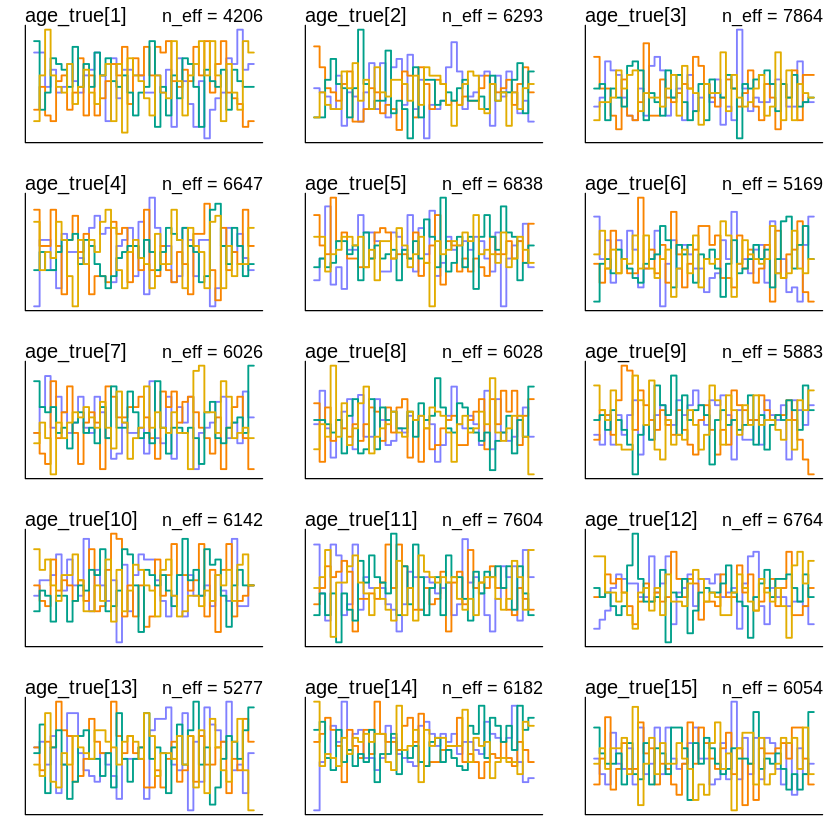

Waiting to draw page 3 of 3



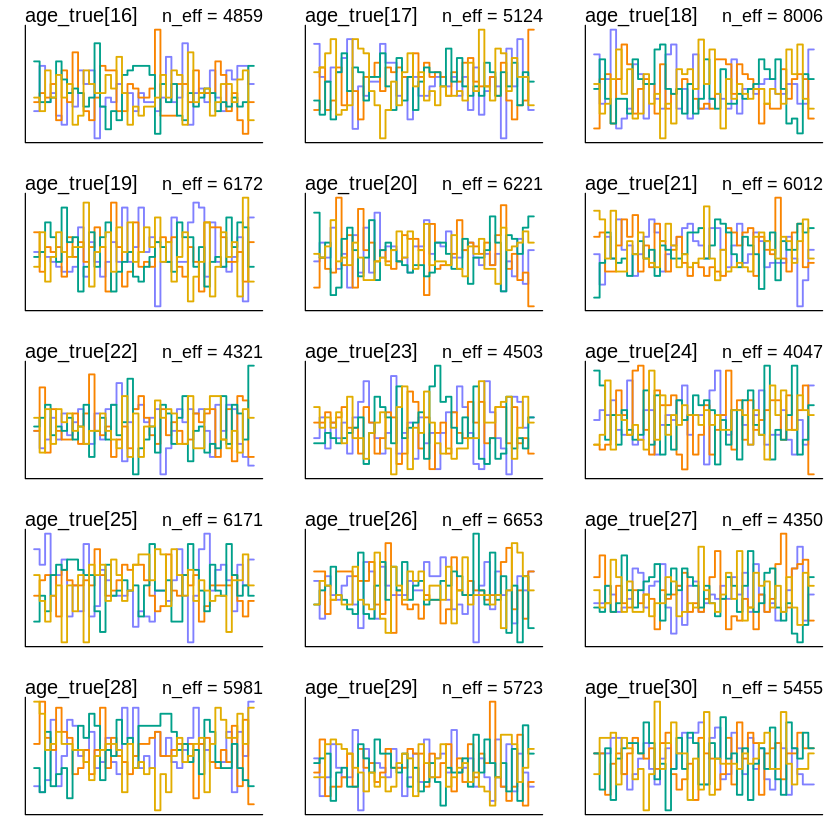

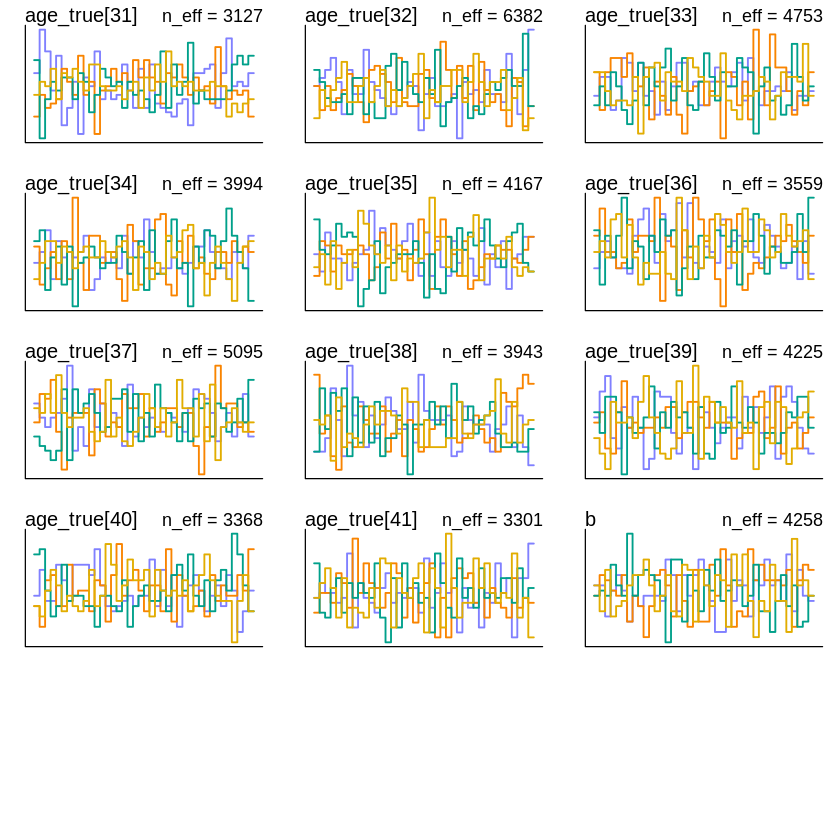

In [ ]:
round(precis(m2, depth=2),2)

traceplot(m2)
trankplot(m2)

In [ ]:
post2 <- extract.samples(m2)
lambdas2 <- exp(post2$b[,1] %o% AGE_seq) - 1
lambda_means2 <- colMeans(lambdas2)
lambda_HPDIs2 <- apply(lambdas2, 2, HPDI)

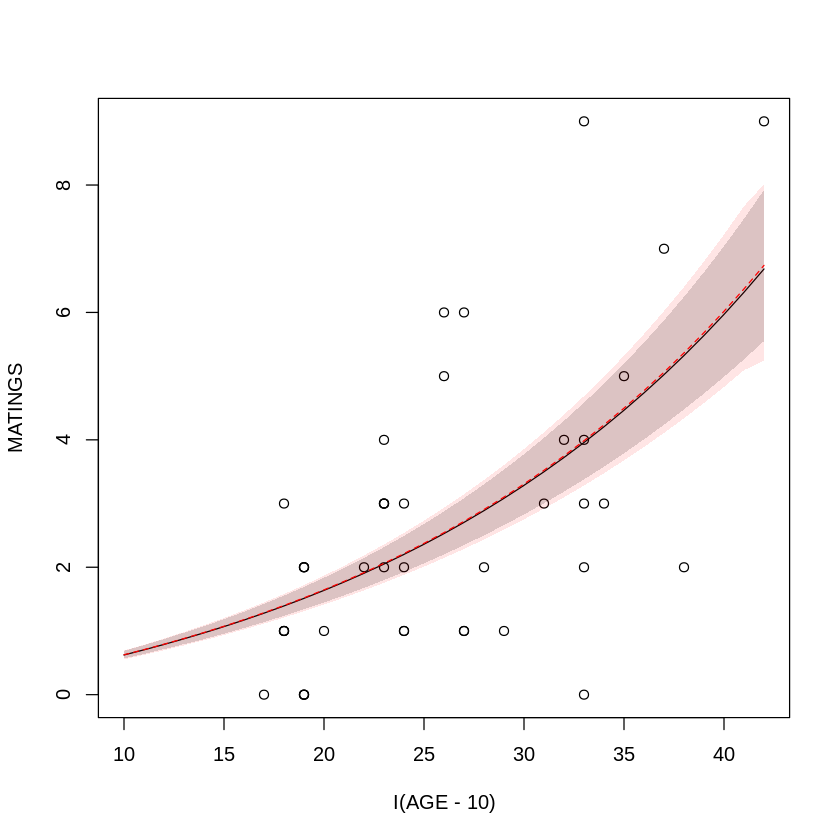

In [ ]:
plot(MATINGS ~ I(AGE-10), d, xlim=range(AGE_seq))
lines(lambda_means ~ AGE_seq)
shade(lambda_HPDIs, AGE_seq)

lines(lambda_means2 ~ AGE_seq, col="red", lty=2)
shade(lambda_HPDIs2, AGE_seq, col=adjustcolor("red", 0.1))

There's not much difference after adding erro error; either for the `precis` output or the plot.

Let's increase the error.

In [ ]:
m3 <- ulam(
  alist(
    MATINGS ~ dpois(lambda),
      lambda <- exp(b*age_true[i]) - 1,
        age_meas ~ dnorm(age_true, 50),
        vector[N]:age_true ~ dunif(0, max_age),
    b ~ dnorm(0,3)
), data=list(MATINGS = d$MATINGS,
             age_meas = d$AGE-10,
             max_age = max(d$AGE)-10,
             N = nrow(d)),
   cores=4,
   chains=4,
   iter=2000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -4.39492e-75, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -3.64795e-76, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 

Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.103664, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this

Chain 1 finished in 1.7 seconds.
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warnin

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warnin

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warnin

Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 


Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -0.00242831, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 finished in 5.3 seconds.
Chain 4 finished in 3.6 seconds.
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -0.485635, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -0.0181066, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

C

Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -0.985355, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac3436ecda.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 8.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 4.6 seconds.
Total execution time: 9.5 seconds.



mean  sd   5.5%  94.5% rhat ess_bulk
age_true[1]   9.11 7.05  0.80 22.27 1.00 7161.40 
age_true[2]  16.37 7.96  4.61 30.39 1.00 6522.21 
age_true[3]  16.53 8.28  4.32 30.73 1.00 5491.14 
age_true[4]  16.42 8.21  4.50 30.50 1.00 4215.43 
age_true[5]  26.66 7.50 14.28 38.55 1.00 3968.05 
age_true[6]   9.01 7.32  0.56 22.94 1.00 4480.24 
age_true[7]   9.12 7.12  0.67 22.80 1.00 5537.92 
age_true[8]   9.07 7.37  0.70 23.28 1.00 5333.97 
age_true[9]  22.01 8.13  9.27 35.56 1.00 4736.49 
age_true[10] 22.30 7.82  9.81 35.06 1.00 4732.23 
age_true[11] 22.30 7.98  9.55 35.45 1.00 4326.62 
age_true[12] 16.48 8.23  4.21 31.05 1.00 4505.88 
age_true[13] 22.37 8.26  9.38 36.06 1.01 4086.41 
age_true[14] 30.00 6.61 18.88 39.83 1.00 4270.14 
age_true[15] 26.83 7.36 14.49 38.45 1.00 4749.78 
age_true[16] 26.58 7.42 14.02 38.28 1.00 4860.92 
age_true[17] 26.61 7.33 14.84 38.04 1.00 3692.40 
age_true[18] 22.50 8.24  9.35 36.13 1.00 3823.44 
age_true[19] 16.52 8.27  4.01 31.10 1.00 6347.65 
age_true[20] 16.52 8.12  4.61 30.45 1.00 5983.61 
age_true[21] 22.26 7.94  9.60 35.51 1.00 6194.17 
age_true[22] 26.68 7.35 14.44 38.12 1.00 5549.82 
age_true[23] 32.71 5.81 22.33 40.82 1.00 4273.57 
age_true[24] 34.55 5.13 25.26 41.16 1.00 4059.83 
age_true[25] 16.55 7.98  4.77 30.50 1.00 6175.63 
age_true[26] 16.56 7.97  4.86 30.42 1.00 6336.49 
age_true[27] 34.53 5.15 25.14 41.14 1.00 3299.90 
age_true[28] 22.27 8.00  9.57 35.68 1.00 5423.94 
age_true[29] 16.52 8.02  4.76 30.46 1.00 6319.78 
age_true[30] 26.77 7.36 14.59 38.35 1.00 4854.30 
age_true[31] 30.12 6.65 18.75 40.01 1.00 3720.34 
age_true[32]  9.35 7.19  0.82 23.13 1.00 5333.73 
age_true[33] 22.44 8.35  9.00 36.15 1.00 4864.42 
age_true[34] 27.08 7.42 14.66 38.63 1.00 3820.80 
age_true[35] 30.32 6.68 18.89 40.17 1.00 3498.36 
age_true[36] 38.02 3.32 31.70 41.71 1.00 4283.55 
age_true[37] 27.15 7.41 14.86 38.63 1.00 4309.53 
age_true[38] 32.82 5.89 22.24 40.87 1.00 3983.18 
age_true[39] 36.21 4.40 27.97 41.54 1.00 3258.11 
age_true[40] 22.86 8.08 10.09 36.02 1.00 4873.17 
age_true[41] 37.88 3.43 31.15 41.72 1.00 4130.63 
b             0.05 0.00  0.04  0.06 1.00 1669.02

Waiting to draw page 2 of 3



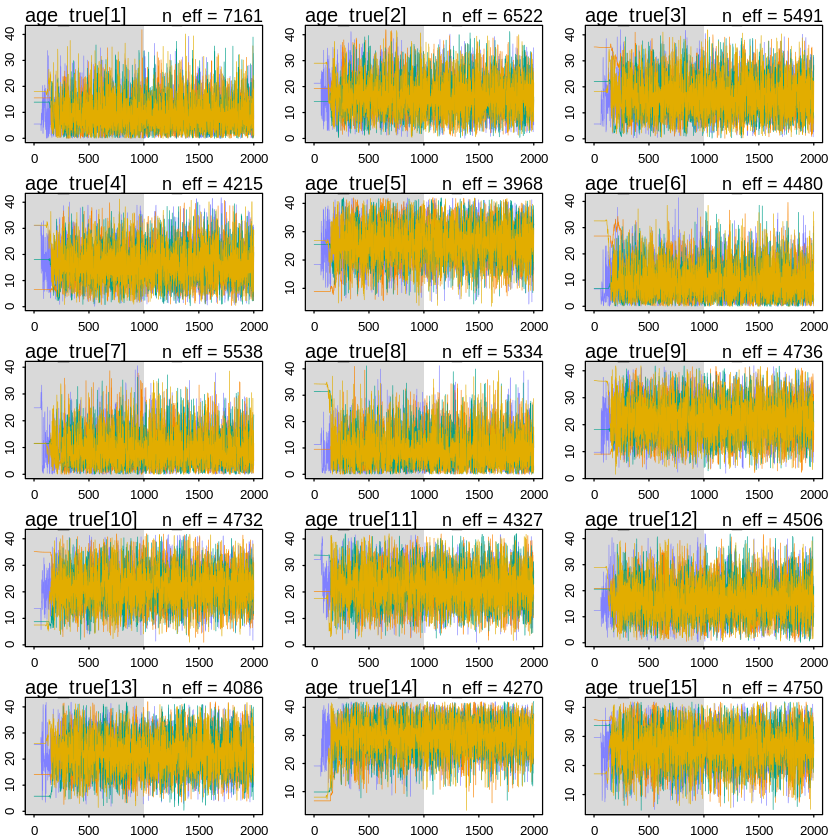

Waiting to draw page 3 of 3



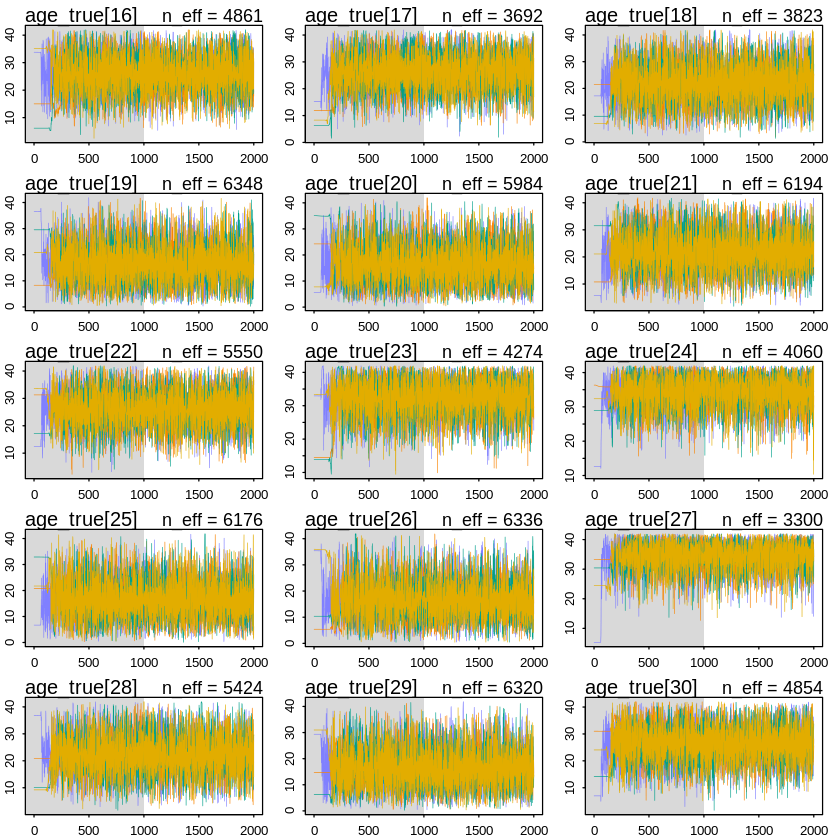

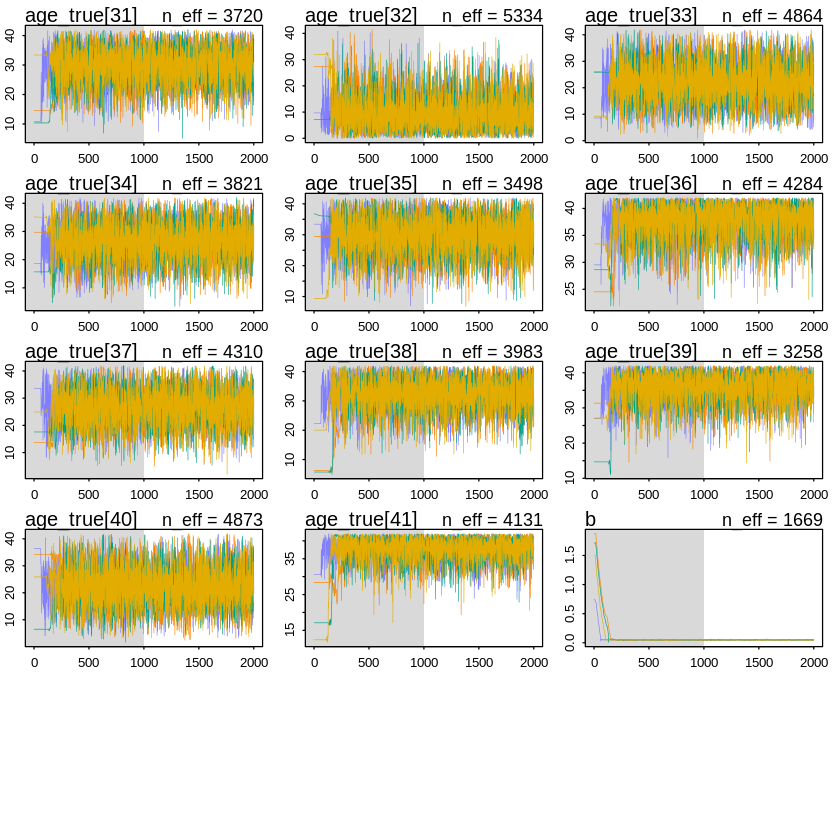

Waiting to draw page 2 of 3



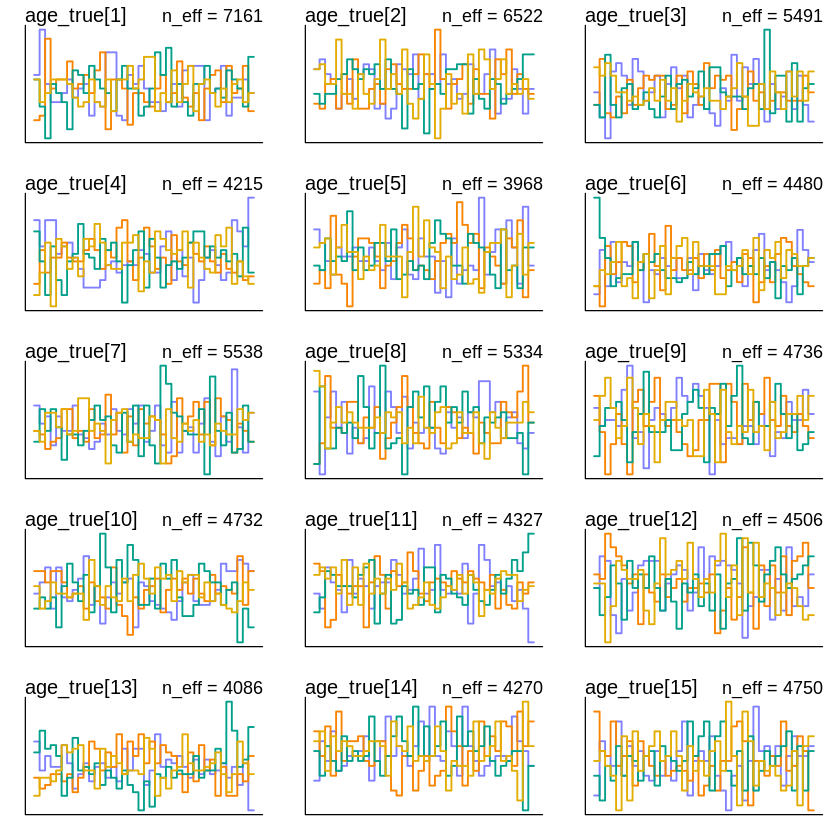

Waiting to draw page 3 of 3



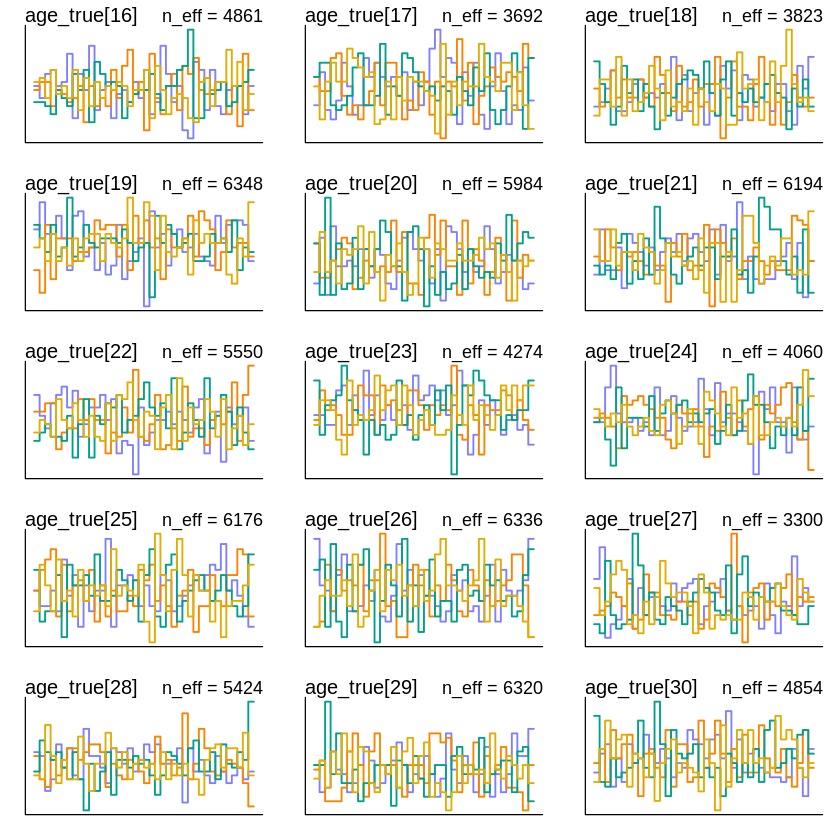

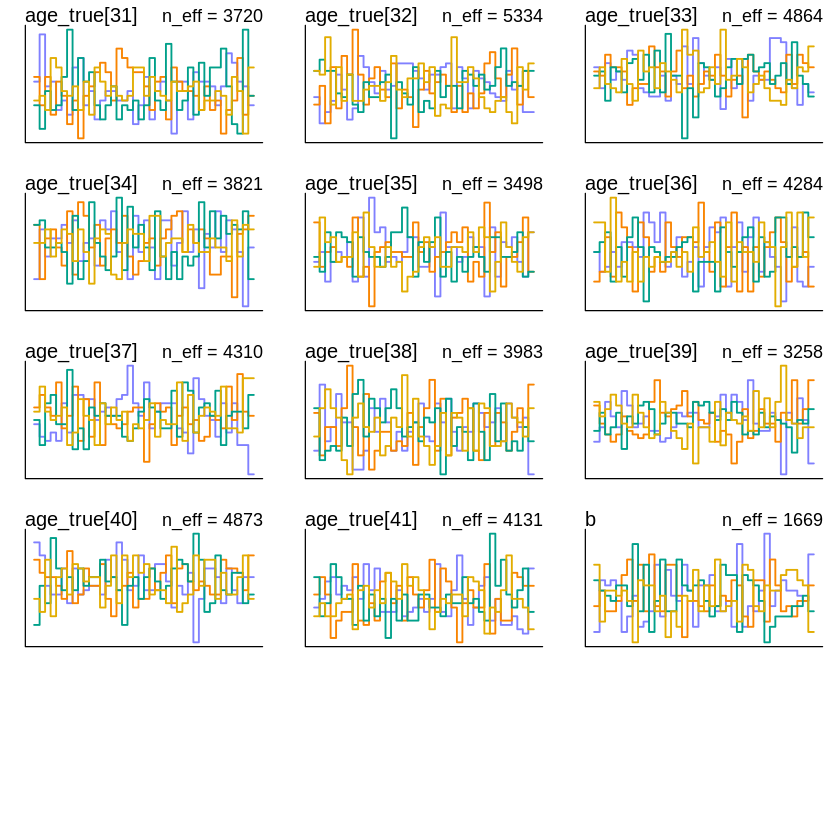

In [ ]:
round(precis(m3, depth=2),2)

traceplot(m3)
trankplot(m3)

In [ ]:
post3 <- extract.samples(m3)
lambdas3 <- exp(post3$b[,1] %o% AGE_seq) - 1
lambda_means3 <- colMeans(lambdas3)
lambda_HPDIs3 <- apply(lambdas3, 2, HPDI)

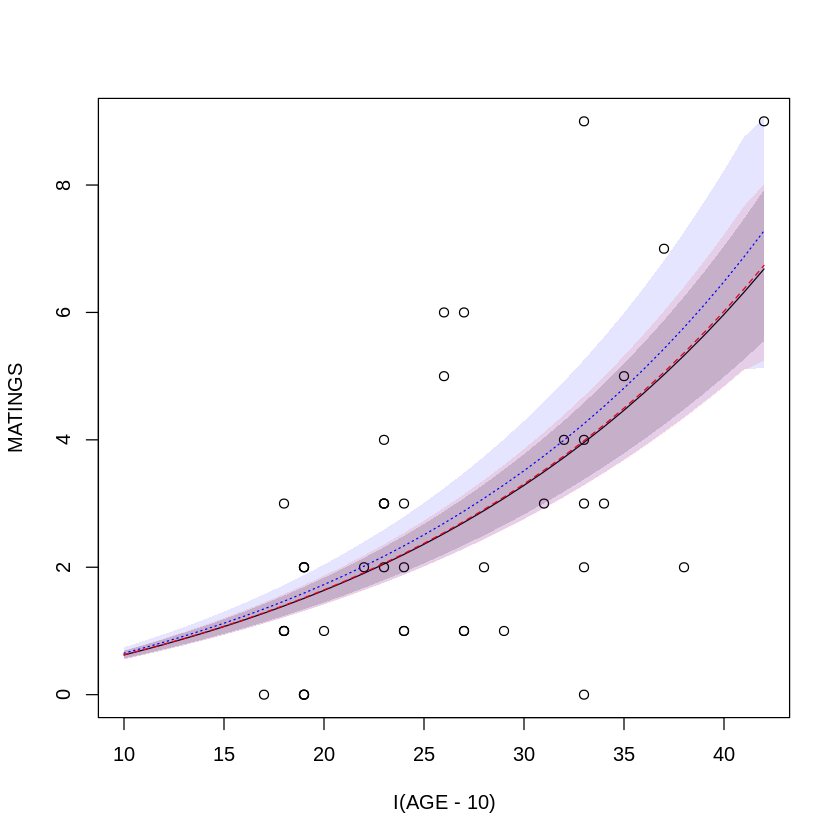

In [ ]:
plot(MATINGS ~ I(AGE-10), d, xlim=range(AGE_seq))
lines(lambda_means ~ AGE_seq)
shade(lambda_HPDIs, AGE_seq)

lines(lambda_means2 ~ AGE_seq, col="red", lty=2)
shade(lambda_HPDIs2, AGE_seq, col=adjustcolor("red", 0.1))

lines(lambda_means3 ~ AGE_seq, col="blue", lty=3)
shade(lambda_HPDIs3, AGE_seq, col=adjustcolor("blue", 0.1))

After an order of magnitude change to the standard error, we see some deviation in the plot.  But if anything, the estimate for `b` is *increasing* rather than decreasing towards 0.

Shall try 500?

In [ ]:
m4 <- ulam(
  alist(
    MATINGS ~ dpois(lambda),
      lambda <- exp(b*age_true[i]) - 1,
        age_meas ~ dnorm(age_true, 500),
        vector[N]:age_true ~ dunif(0, max_age),
    b ~ dnorm(0,3)
), data=list(MATINGS = d$MATINGS,
             age_meas = d$AGE-10,
             max_age = max(d$AGE)-10,
             N = nrow(d)),
   cores=4,
   chains=4,
   iter=2000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...



Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[14] is -1.15704e-77, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[11] is -1.38863e-205, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Cha

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[6] is -1.77908e-94, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[6] is -2.67636e-11, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[30] is -2.86403e-12, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[30] is -1.8358e-12, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[3] is -5.20262e-11, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[3] is -2.13215e-10, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 

Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1.66546e-103, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if 

Chain 2 finished in 4.2 seconds.
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteratio

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -0.00236119, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 finished in 4.1 seconds.
Chain 4 finished in 3.8 seconds.
Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -1, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warnin

Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -0.00226219, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -9.02967e-07, but must be nonnegative! (in '/tmp/RtmpyIGDPx/model-ac63e6d287.stan', line 19, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 4.6 seconds.
Total execution time: 6.7 seconds.



In [ ]:
post4 <- extract.samples(m4)
lambdas4 <- exp(post3$b[,1] %o% AGE_seq) - 1
lambda_means4 <- colMeans(lambdas4)
lambda_HPDIs4 <- apply(lambdas4, 2, HPDI)

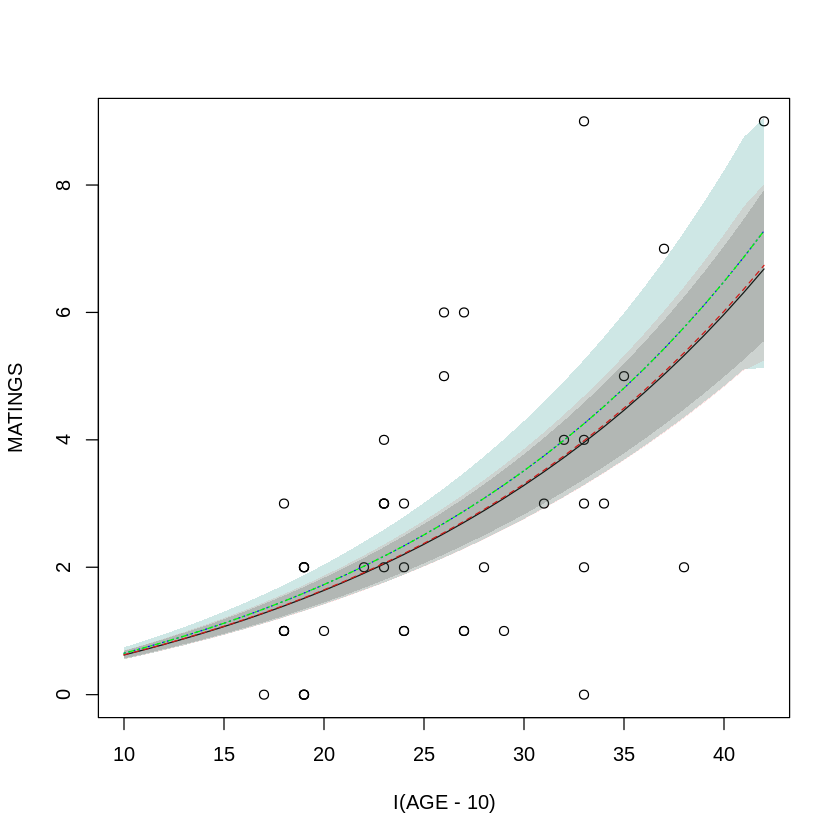

In [ ]:
plot(MATINGS ~ I(AGE-10), d, xlim=range(AGE_seq))
lines(lambda_means ~ AGE_seq)
shade(lambda_HPDIs, AGE_seq)

lines(lambda_means2 ~ AGE_seq, col="red", lty=2)
shade(lambda_HPDIs2, AGE_seq, col=adjustcolor("red", 0.1))

lines(lambda_means3 ~ AGE_seq, col="blue", lty=3)
shade(lambda_HPDIs3, AGE_seq, col=adjustcolor("blue", 0.1))

lines(lambda_means4 ~ AGE_seq, col="green", lty=4)
shade(lambda_HPDIs4, AGE_seq, col=adjustcolor("green", 0.1))

In [ ]:
precis(m1)
precis(m2)
precis(m3)
precis(m4)

mean       sd          5.5%       94.5%      rhat     ess_bulk
b 0.04842275 0.002415563 0.04486329 0.05224721 1.010721 555.0577

41 vector or matrix parameters hidden. Use depth=2 to show them.



mean       sd          5.5%       94.5%      rhat      ess_bulk
b 0.04856607 0.002703995 0.04423647 0.05286908 0.9997189 4257.992

41 vector or matrix parameters hidden. Use depth=2 to show them.



mean       sd          5.5%       94.5%      rhat     ess_bulk
b 0.05004718 0.003638673 0.04453481 0.05603509 1.000548 1669.02

41 vector or matrix parameters hidden. Use depth=2 to show them.



mean       sd          5.5%       94.5%      rhat     ess_bulk
b 0.05000661 0.003738568 0.04425659 0.05614648 1.001256 1965.272

Why isn't the estimate budging?  I suspect because we're  adding the same amount of error to each observation (unlike the divorce example, where each state had its own error), so the *signal* remains even among the noise.

### 15H3

The fact that information flows in all directions among parameters sometimes leads to rather  unintuitive conclusions. Here’s an example from missing data imputation, in which imputation of a  single datum reverses the direction of an inferred relationship. Use these data:

```
set.seed(100)
x <- c(rnorm(10), NA)
y <- c(rnorm(10, x), 100)
d <- list(x=x, y=y)
```

These data comprise 11 cases, one of which has a missing predictor value. You can quickly confirm  that a regression of $y$ on $x$ for only the complete cases indicates a strong positive relationship between the two variables. But now fit this model, imputing the one missing value for $x$:

$$y_i \sim \text{Normal}(\mu_i, \sigma)$$
$$\mu_i = \alpha + \beta x_i$$
$$x_i \sim \text{Normal}(0, 1)$$
$$\alpha \sim \text{Normal}(0, 100)$$
$$\beta \sim \text{Normal}(0, 100)$$
$$\sigma \sim \text{Exponential}(1)$$

Be sure to run multiple chains. What happens to the posterior distribution of $β$? Be sure to inspect  the full density. Can you explain the change in inference?

Let's generate the data.

In [ ]:
set.seed(100)
x <- c(rnorm(10), NA)
y <- c(rnorm(10, x), 100) # So y has mean x
d <- data.frame(x=x, y=y)

d

x           y          
1  -0.50219235  -0.4123062
2   0.13153117   0.2278056
3  -0.07891709  -0.2805510
4   0.88678481   1.6266253
5   0.11697127   0.2403508
6   0.31863009   0.2893134
7  -0.58179068  -0.9706449
8   0.71453271   1.2253890
9  -0.82525943  -1.7390736
10 -0.35986213   1.9504347
11          NA 100.0000000

Let's first run the complete-cases only.

In [ ]:
m.cc <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a + b*x,
        a ~ dnorm(0, 100),
        b ~ dnorm(0, 100),
      sigma ~ dexp(1)
  ), data=d[complete.cases(d),],
     chains=4,
     cores=4,
     iter=1000
)

precis(m.cc)

mean      sd        5.5%       94.5%     rhat     ess_bulk
a     0.2390657 0.3164747 -0.2568187 0.7450676 1.003613 1298.861
b     1.4134082 0.6058353  0.4429241 2.3569348 1.000880 1453.585
sigma 0.9621743 0.2599150  0.6381249 1.4291435 1.001296 1136.094

Now let's impute the NA value.

In [ ]:
m.impute <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a + b*x,
        x ~ dnorm(0, 1),
        a ~ dnorm(0, 100),
        b ~ dnorm(0, 100),
      sigma ~ dexp(1)
  ), data=d,
     chains=4,
     cores=4,
     iter=1000
)

precis(m.impute, depth=2)

mean       sd        5.5%       94.5%      rhat     ess_bulk 
a             1.655551 3.4491729  -3.591225   7.263803 1.000713 1349.5624
b           -22.191199 3.9034035 -28.757559 -16.807871 1.005354  989.5106
sigma        10.674030 1.9173158   7.835404  13.978926 1.000874  851.2505
x_impute[1]  -3.638512 0.6765892  -4.747549  -2.602113 1.000757  810.8501

These results are obviously different.  We're told to explore the **entire** posterior.  I suspect this means that we should look, not only at the parameter estimates, but also at their relationships.

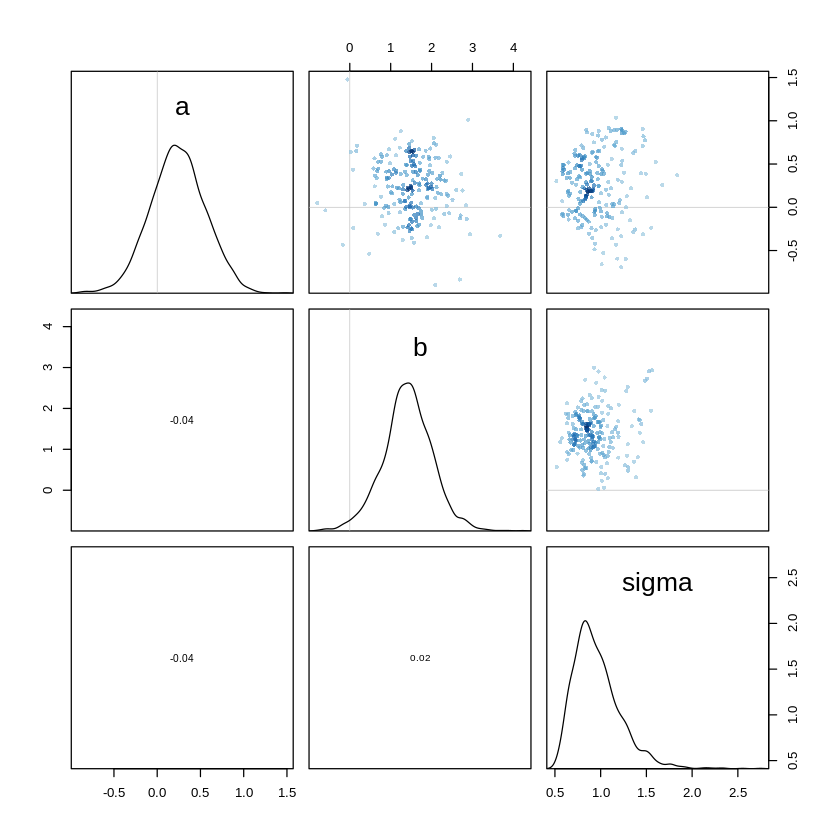

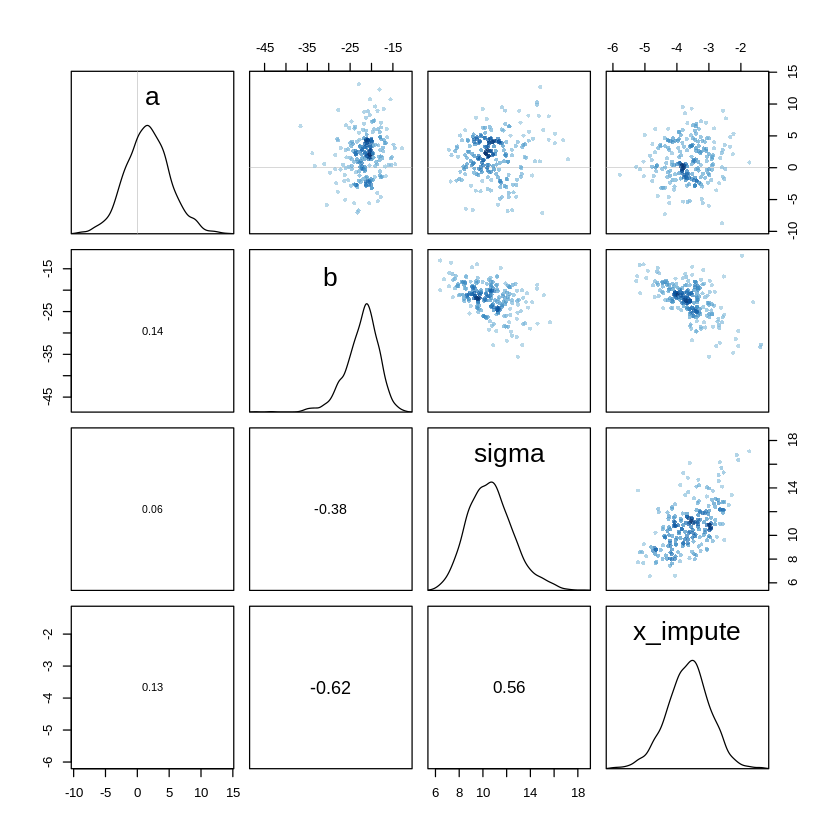

In [ ]:
suppressWarnings({
pairs(m.cc)
pairs(m.impute)
})

In the complete-case model, the parameters are basically uncorrelated.  However, owing to the outstandingly high value of `y` and commisurate estimate of `x_impute`, the estimate for `b` is necessarily bonkers: it must somehow account for the 1:1 relationship in the first 10 $(x,y)$ values while also drawing `x` from a `rnorm(0,1)` distribution.  So there is a strong relationship between the estimates for `b` and `x_impute`.   

### 15H4
Using `data(Primates301)`, consider the relationship between brain volume (`brain`) and  body mass (`body`). These variables are presented as single values for each species. However, there  is always a range of sizes in a species, and some of these measurements are taken from very small  samples. So these values are measured with some unknown error.

We don’t have the raw measurements to work with—that would be best. But we can imagine  what might happen if we had them. Suppose error is proportional to the measurement. This makes  sense, because larger animals have larger variation. As a consequence, the uncertainty is not uniform  across the values and this could mean trouble.

Let’s make up some standard errors for these measurements, to see what might happen. Load  the data and scale the measurements so the maximum is 1 in both cases:

In [ ]:
data(Primates301)
d <- Primates301
cc <- complete.cases( d$brain, d$body)
B <- d$brain[cc]
M <- d$body[cc]
B <- B/ max(B)
M <- M/ max(M)

Now I’ll make up some standard errors for B and M, assuming error is 10% of the measurement.

In [ ]:
Bse <- B*0.1
Mse <- M*0.1

Let’s model these variables with this relationship:  

$$B_i ∼ \text{Log-Normal}(µ_i, σ)$$
$$µ_i = α + β \log M_i$$  

This says that brain volume is a log-normal variable, and the mean on the log scale is given by $µ$.  What this model implies is that the expected value of $B$ is:  

$$𝔼(B_i |M_i) = \exp(α)M_i^β$$

So this is a standard allometric scaling relationship—incredibly common in biology.  Ignoring measurement error, the corresponding `ulam` model is:

In [ ]:
dat_list <- list( B = B, M = M)
m15H4 <- ulam(
  alist(
    B ~ dlnorm( mu, sigma),
    mu <- a + b*log(M),
    a ~ normal(0,1),
    b ~ normal(0,1),
    sigma ~ exponential(1)
  ), data=dat_list)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/RtmpAjmw8x/model-17431169bcf.stan', line 18, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/RtmpAjmw8x/model-17431169bcf.stan', line 18, column 4 to column 32)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if

Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


Your job is to add the measurement errors to this model. Use the divorce/marriage example in the  chapter as a guide. It might help to initialize the unobserved true values of $B$ and $M$ using the observed  values, by adding a list like this to `ulam`:

```
start=list( M_true=dat_list$M, B_true=dat_list$B)
```

Compare the inference of the measurement error model to those of `m1.1` above. Has anything changed?  Why or why not?

#### Answer

In [ ]:
dat_list2 <- list(B=B, Bse=Bse, M=M, Mse=Mse, N2=length(dat_list$B))
m15H4b <- ulam(
  alist(
    B ~ dnorm(B_true, Bse),
      vector[N2]:B_true ~ dlnorm(mu, sigma),
        mu <- a + b*log(M_true[i]),
          M ~ dnorm(M_true, Mse),
            vector[N2]:M_true ~ dnorm(0,1),
          a ~ normal(0,1),
          b ~ normal(0,1),
        sigma ~ exponential(1)
  ), data=dat_list2,
     start=list(M_true=dat_list$M, B_true=dat_list$B, a=0, b=0, sigma=1), # must assign all values a start
     chains=4,
     cores=4,
     iter=1000,
     control=list(adapt_delta=0.95, max_treedepth=15)) # must assign value for adapt_delta

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Location parameter[1] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Location parameter[2] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if thi

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Location parameter[2] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Location parameter[1] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if thi

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[1] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[6] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if thi

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[2] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[1] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if thi

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Location parameter[122] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[122] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[79] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if 

Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Location parameter[121] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Location parameter[122] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if

Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[121] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Location parameter[122] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if

Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[121] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[79] is -nan, but must be finite! (in '/tmp/RtmpAjmw8x/model-174343fddee.stan', line 25, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if 

Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 55.8 seconds.
Chain 1 Iteration: 800 

See https://mc-stan.org/misc/warnings for details.




In [ ]:
round(precis(m15H4), 2)
round(precis(m15H4b), 2)

mean sd   5.5% 94.5% rhat ess_bulk
a     0.42 0.06 0.34 0.51  1.00 177.99  
b     0.78 0.01 0.76 0.80  1.01 172.05  
sigma 0.29 0.02 0.27 0.32  1.00 299.20

364 vector or matrix parameters hidden. Use depth=2 to show them.



mean sd   5.5% 94.5% rhat ess_bulk
a     0.42 0.06 0.32 0.51  1    1775.76 
b     0.78 0.01 0.76 0.81  1    1729.45 
sigma 0.26 0.02 0.24 0.29  1    2053.32

Basically identical even after adding measurement error!  Except for maybe `sigma`, which might be a little bigger in the measurement-error model.

Why not?  I'm actually not sure why measurement error in this cause might be expected to change the estimates.  I'd think that adding *noise* could make the estimates less certain, but the signal would remain.  Apparently, in this case, the added error didn't do much to even to the uncertainty of the estimates.  

Why not?  I suspect it has something to do with how we added noise: in proportion to the size of the animal.  Let's look at the distributions of these variables.

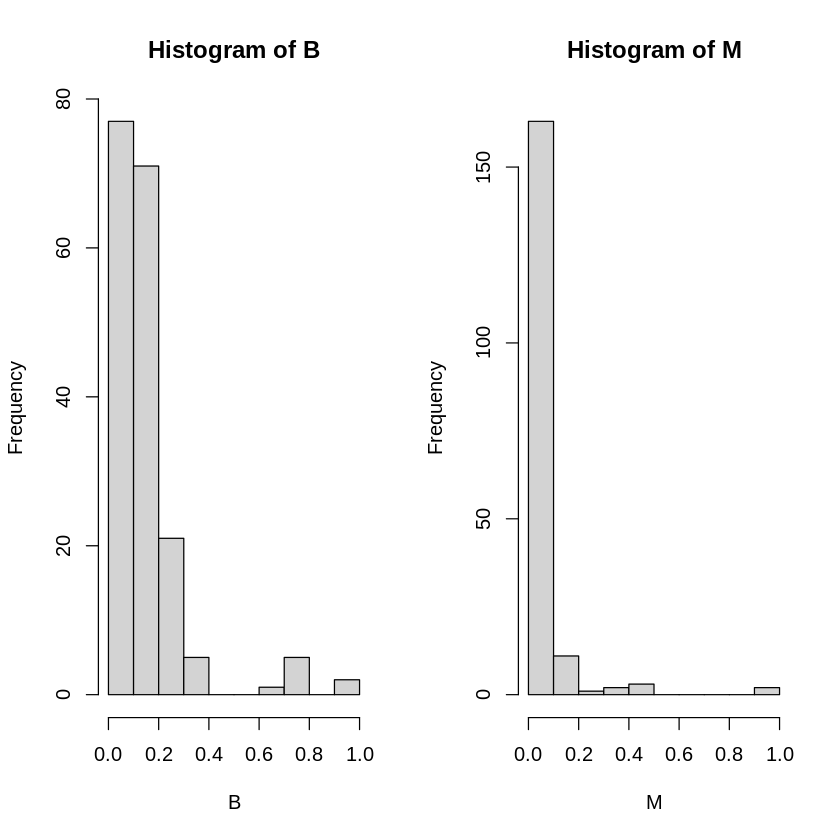

In [ ]:
par(mfrow=c(1,2))
hist(B)
hist(M)

So most animals were small...which means only a small amount of error was added...which suggests that we didn't add much noise at all.

### 15H5

Now consider missing values—this data set is lousy with them. You can ignore measurement  error in this problem. Let’s get a quick idea of the missing values by counting them in each variable:

In [7]:
data(Primates301)
d <- Primates301
as.data.frame(colSums(is.na(d)))

colSums(is.na(d))
name                  0              
genus                 0              
species               0              
subspecies          267              
spp_id                0              
genus_id              0              
social_learning      98              
research_effort     115              
brain               117              
body                 63              
group_size          114              
gestation           161              
weaning             185              
longevity           181              
sex_maturity        194              
maternal_investment 197

We’ll continue to focus on just brain and body, to stave off insanity. Consider only those species with  measured body masses:

In [8]:
cc <- complete.cases(d$body)
M <- d$body[cc]
M <- M/max(M)
B <- d$brain[cc]
B <- B/max(B, na.rm=TRUE)

You should end up with 238 species and 56 missing brain values among them.

In [17]:
d_cc <- data.frame(M, B)
nrow(d_cc); sum(is.na(d_cc$B))

[1] 238

[1] 56

First, consider whether there is a pattern to the missing values. Does it look like missing values  are associated with particular values of body mass? Draw a DAG that represents how missingness  works in this case. Which type (MCAR, MAR, MNAR) is this?

Second, impute missing values for brain size. It might help to initialize the 56 imputed variables to a valid value:

```
start=list( B_impute=rep(0.5,56) )
```

This just helps the chain get started.  Compare the inferences to an analysis that drops all the missing values. Has anything changed?  Why or why not? Hint: Consider the density of data in the ranges where there are missing values.  You might want to plot the imputed brain sizes together with the observed values.

#### Answer
We must first determine if there is a pattern of missing values.

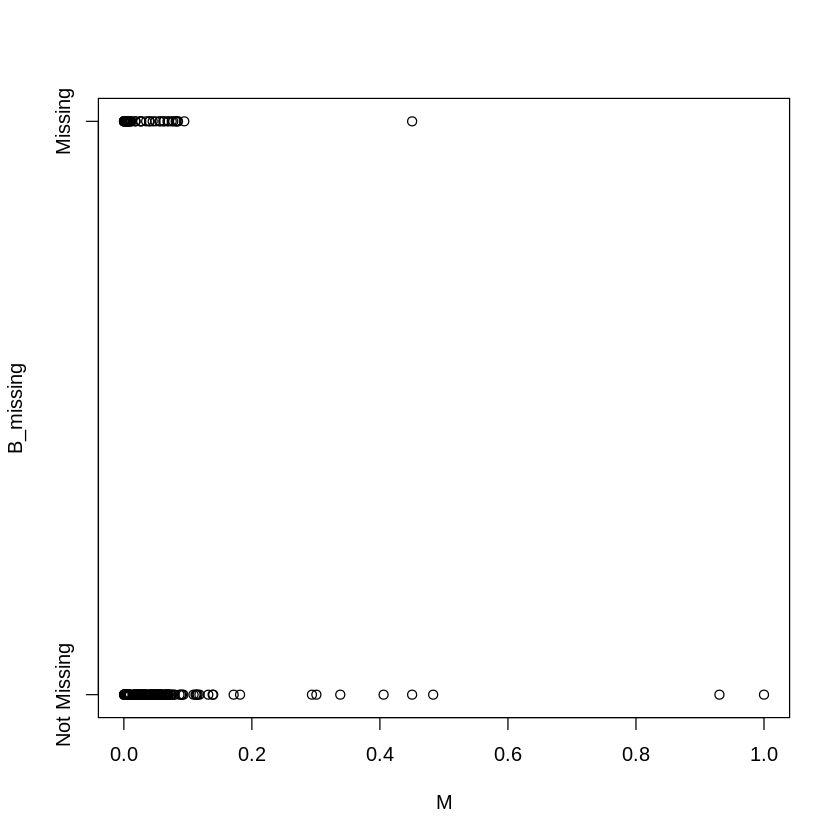

In [10]:
B_missing <- is.na(d_cc$B)
plot(B_missing ~ M, yaxt="n")
axis(side=2, at=c(0,1), labels=c("Not Missing", "Missing"))

Almost all of the missing values are in low-mass species.  If the mechanism of missingness was MCAR (missing COMPLETELY at random), we should see a uniformly random horizontal smear of dots across the top.  So this is NOT MCAR--the missing values are related to the actual values of the outcome, so it's some flavor of MAR or MNAR.

If it is MAR, then a DAG may look like

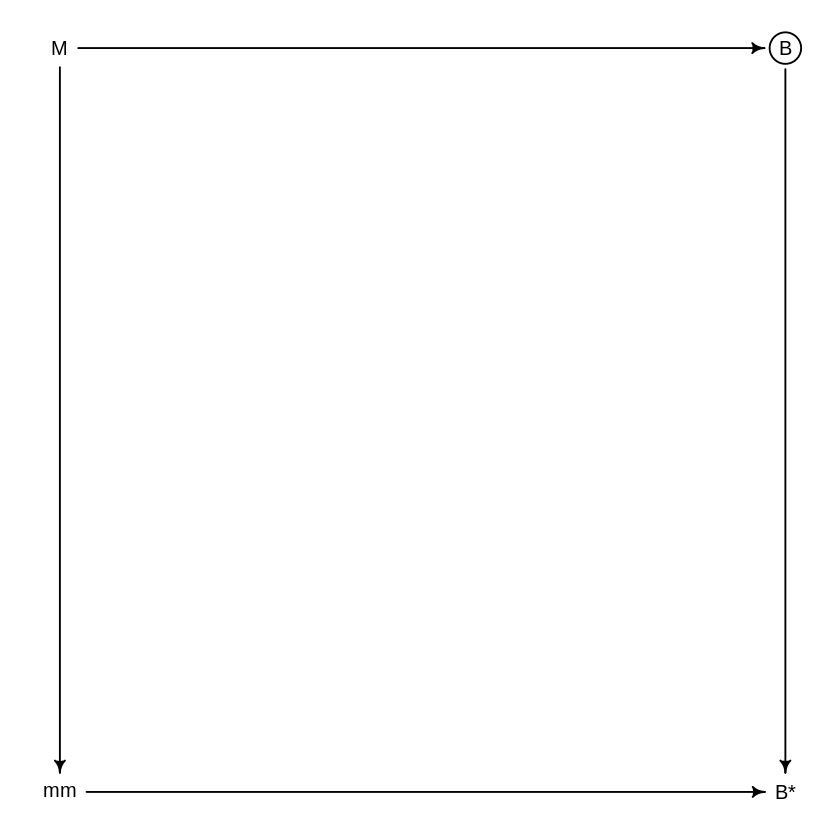

In [11]:
library(dagitty)

MAR1_dag <- dagitty('dag{B[unobserved]
                         M -> B -> "B*"
                         M -> mm -> "B*"}')
coordinates(MAR1_dag) <- list(x=c(M=0, B=1, mm=0, "B*"=1),
                              y=c(M=0, B=0, mm=1, "B*"=1))
drawdag(MAR1_dag)

or

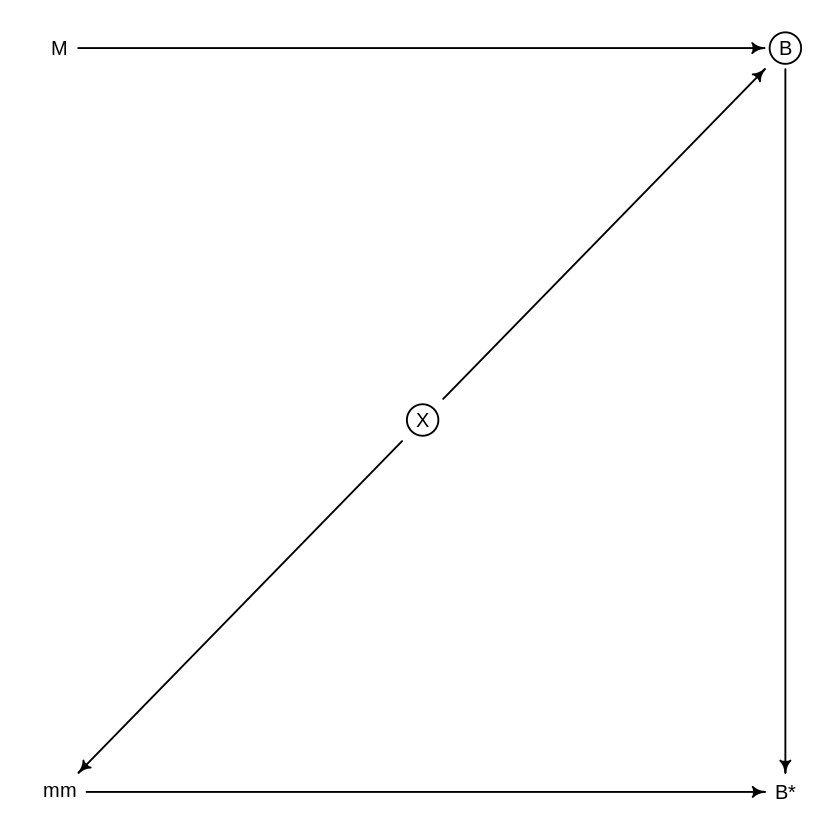

In [12]:
MAR2_dag <- dagitty('dag{B[unobserved]
                         X[unobserved]
                         M -> B -> "B*"
                         mm <- X -> B
                         mm -> "B*"}')
coordinates(MAR2_dag) <- list(x=c(M=0, B=1, mm=0, "B*"=1, X=0.5),
                              y=c(M=0, B=0, mm=1, "B*"=1, X=0.5))
drawdag(MAR2_dag)

where `mm` is the "missingness mechanism".

If it is MNAR, it may look like

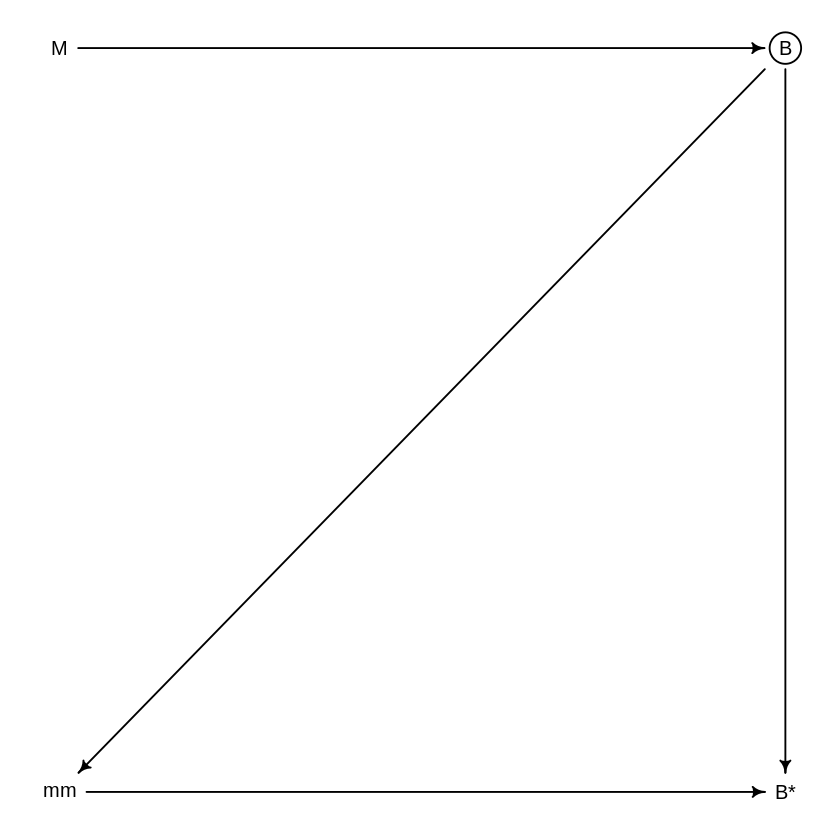

In [13]:
MNAR_dag <- dagitty('dag{B[unobserved]
                         M -> B -> "B*"
                         B -> mm -> "B*"}')
coordinates(MNAR_dag) <- list(x=c(M=0, B=1, mm=0, "B*"=1),
                              y=c(M=0, B=0, mm=1, "B*"=1))
drawdag(MNAR_dag)

What type of missingness do we have here?  I don't know, but let's hope it MAR1.

Now we need to impute the missing values of `B` and compare to a complete-cases model.

Let's start with the complete case model.  For this, we'll just rerun the model from question 15H4.

In [20]:
dlist_cc <- as.list(d_cc[complete.cases(d_cc),])

m_cc <- ulam(
  alist(
    B ~ dlnorm(mu, sigma),
      mu <- a + b*log(M),
      a ~ dnorm(0,1),
      b ~ dnorm(0,1),
    sigma ~ dexp(1)
  ), data=dlist_cc,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f94859da37.stan', line 18, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f94859da37.stan', line 18, column 4 to column 32)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f94859da37.stan', line 18, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f94859da37.stan', line 18, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f94859da37.stan', line 18, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if

Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.7 seconds.
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.9 seconds.
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampl

Now we'll impute.  To impute, we need to set a prior for the variable(s) with missing values.  In this case, the missing values are in the outcome `B`...which has a *prior*: the likelihood.  So the model doesn't actually change.

In [14]:
dlist <- list(B=B, M=M)

m_MAR1 <- ulam(
  alist(
    B ~ dlnorm(mu, sigma),
      mu <- a + b*log(M),
      a ~ dnorm(0,1),
      b ~ dnorm(0,1),
    sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000,
     start=list(B_impute=rep(0.5, 56))
)

Found 56 NA values in B and attempting imputation.

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: a, b, sigma
 - chain 2: a, b, sigma
 - chain 3: a, b, sigma
 - chain 4: a, b, sigma

To disable this message use options(cmdstanr_warn_inits = FALSE).




Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[12] is -0.780897, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[2] is -0.184666, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Cha

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[230] is -0.203005, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if

Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Random variable[153] is -0.00441106, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Random variable[155] is -0.000712828, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fi

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[2] is -0.00311684, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[155] is -0.000424384, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[152] is -0.000675285, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is f

Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[2] is -0.00749337, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[2] is -0.00882622, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,



Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[152] is -0.000413813, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[152] is -0.0079367, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[155] is -1.98903e-05, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[152] is -5.73532e-05, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is f

Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[152] is -0.000191277, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[155] is -0.00462828, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Random variable[152] is -0.00229203, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lognormal_lpdf: Random variable[155] is -0.00233892, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[152] is -0.00196088, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[152] is -0.000548123, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fi

Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[155] is -0.00041006, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[152] is -0.000782145, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[152] is -0.0010168, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lognormal_lpdf: Random variable[156] is -0.000695545, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 15.0 seconds.
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 15.4 seconds.
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[155] is -8.84211e-05, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[2] is -0.00335598, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine

Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[152] is -0.000426036, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[155] is -0.000240977, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is f

Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[152] is -1.20951e-05, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 1 finished in 16.2 seconds.
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Random variable[155] is -0.000192699, but must be nonnegative! (in '/tmp/Rtmp0bQ3m0/model-3f9261248ff.stan', line 35, column 4 to column 38)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 16.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 15.8 seconds.
Total execution time: 16.8 seconds.



See https://mc-stan.org/misc/warnings for details.




Let's compare the `precis` outputs.

In [21]:
round(precis(m_cc),2)
round(precis(m_MAR1),2)

mean sd   5.5% 94.5% rhat ess_bulk
a     0.43 0.06 0.34 0.52  1.01  633.43 
b     0.78 0.01 0.76 0.81  1.01  659.51 
sigma 0.29 0.02 0.27 0.32  1.01 1093.59

56 vector or matrix parameters hidden. Use depth=2 to show them.



mean sd   5.5% 94.5% rhat ess_bulk
a     0.43 0.06 0.34 0.53  1     912.90 
b     0.78 0.01 0.76 0.81  1     924.52 
sigma 0.29 0.02 0.27 0.32  1    1529.88

These used slightly different data, but the posteriors are basically identical.